In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import sklearn
from sklearn.cluster import AgglomerativeClustering
from matplotlib_venn import venn3
from venn import venn
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [13]:

input_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/Cross-correlations on concatenated trials'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

48

processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01


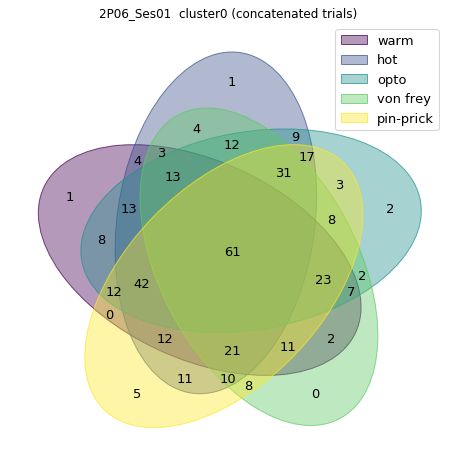

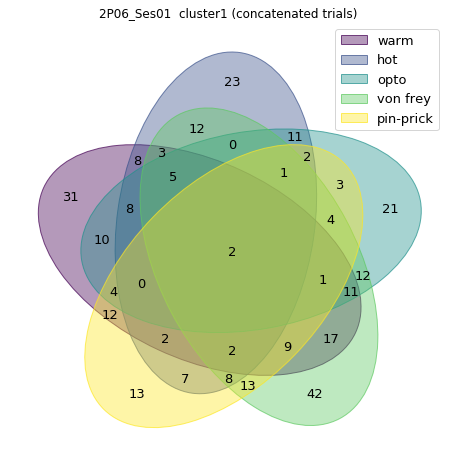

processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02


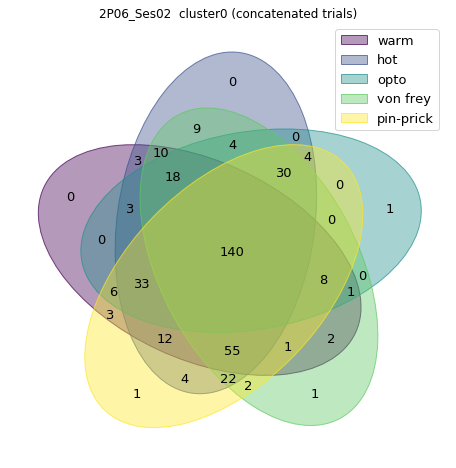

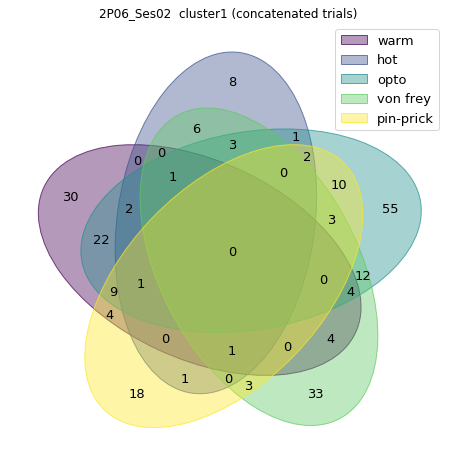

processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03


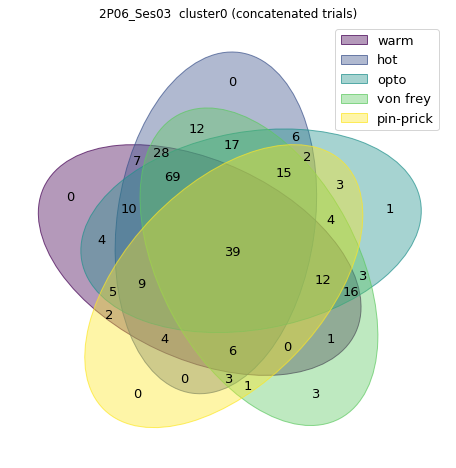

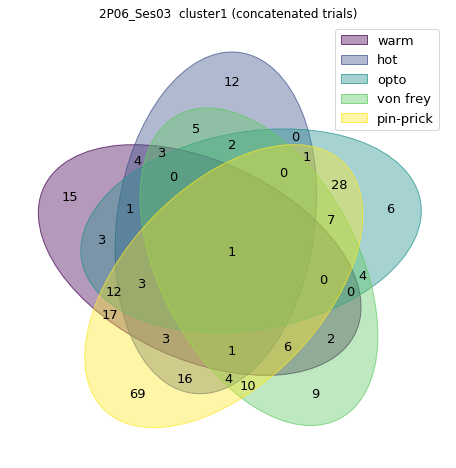

processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04


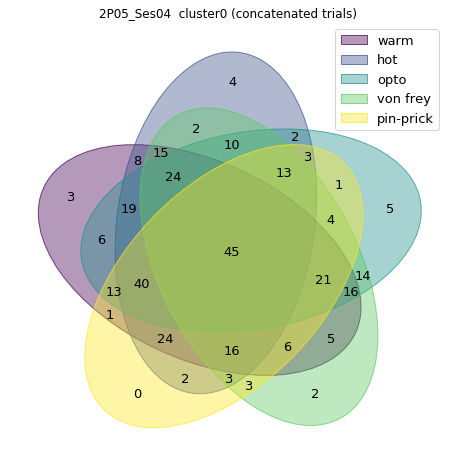

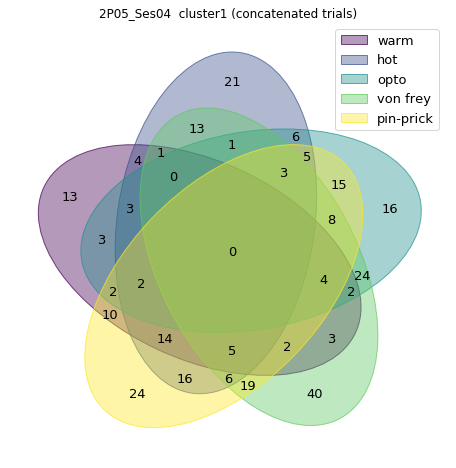

processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04


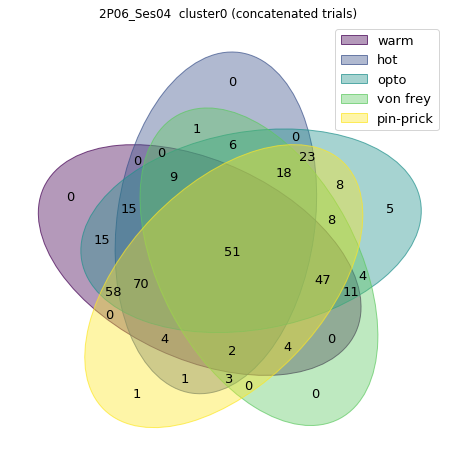

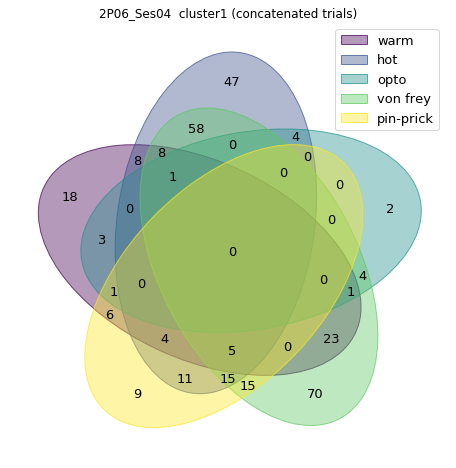

processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05


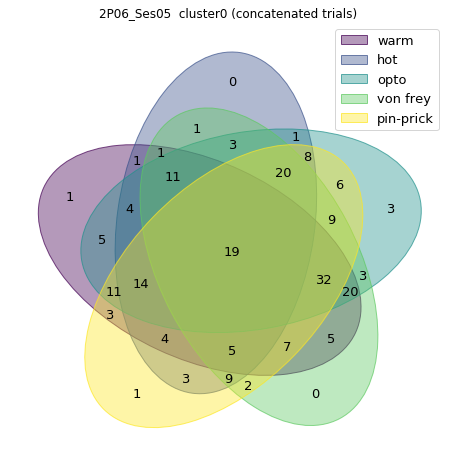

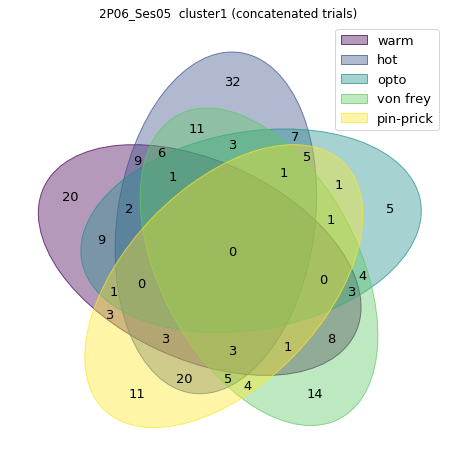

processing:  dF_F0_SHORT_2P05_Ses06.csv
2P05_Ses06


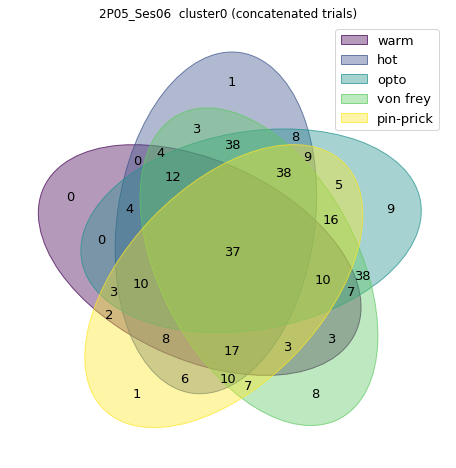

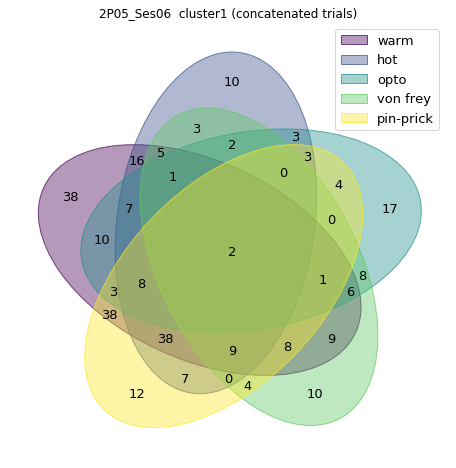

processing:  dF_F0_SHORT_2P06_Ses06.csv
2P06_Ses06


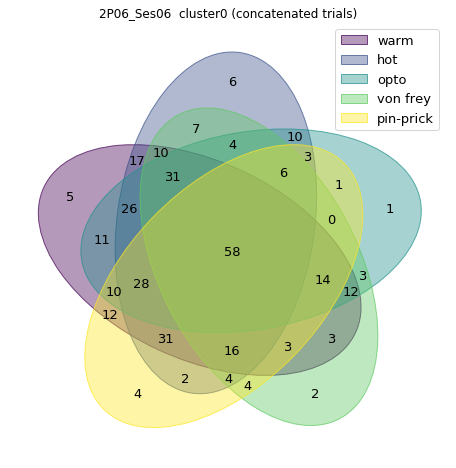

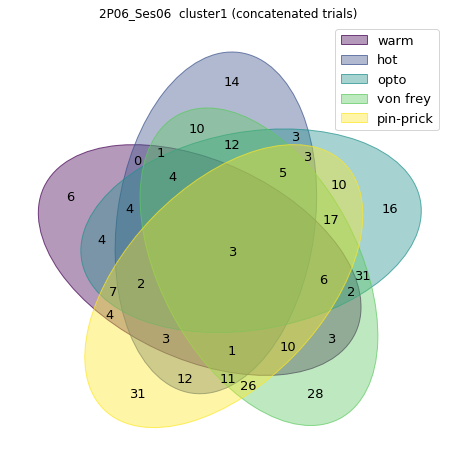

processing:  dF_F0_SHORT_2P05_Ses07.csv
2P05_Ses07


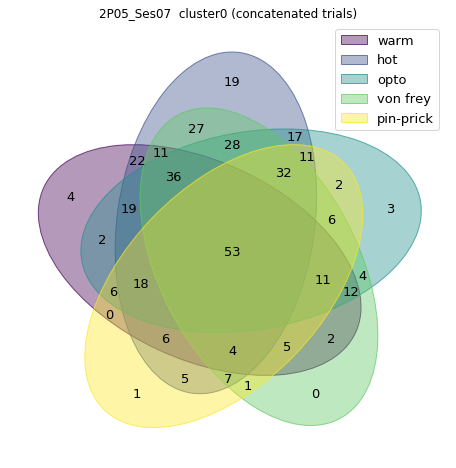

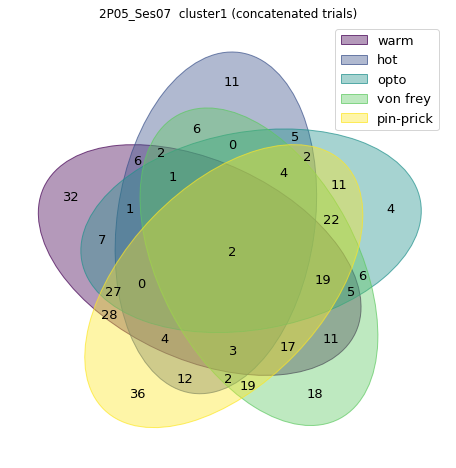

processing:  dF_F0_SHORT_2P06_Ses07.csv
2P06_Ses07


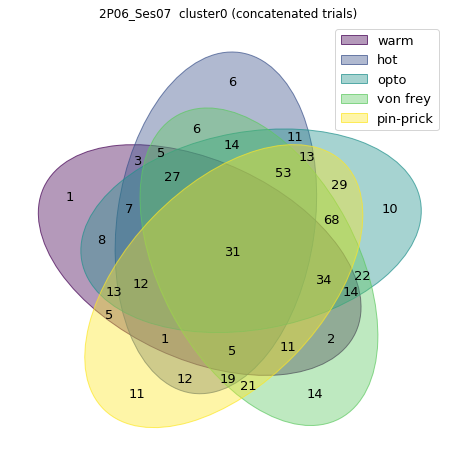

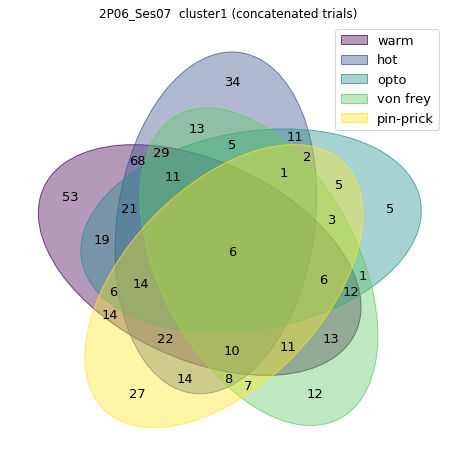

processing:  dF_F0_SHORT_2P07_Ses01.csv
2P07_Ses01


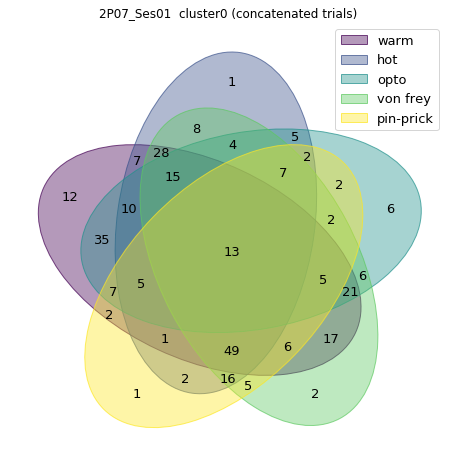

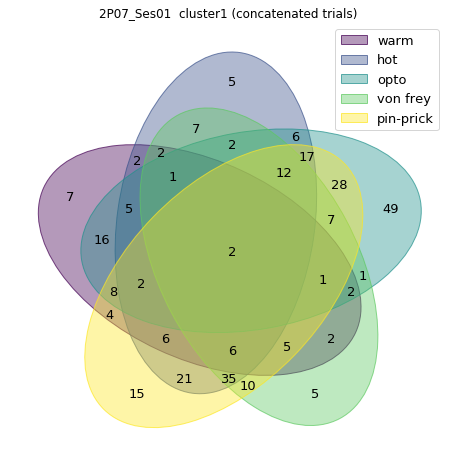

processing:  dF_F0_SHORT_2P08_Ses01.csv
2P08_Ses01


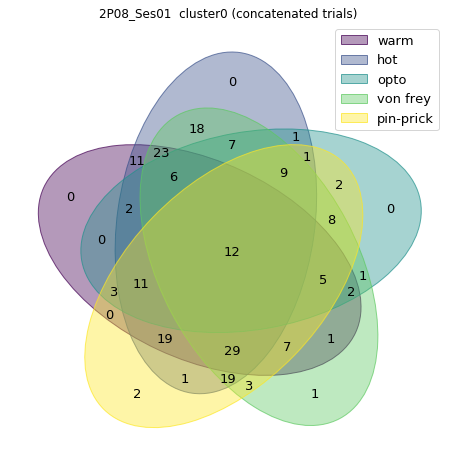

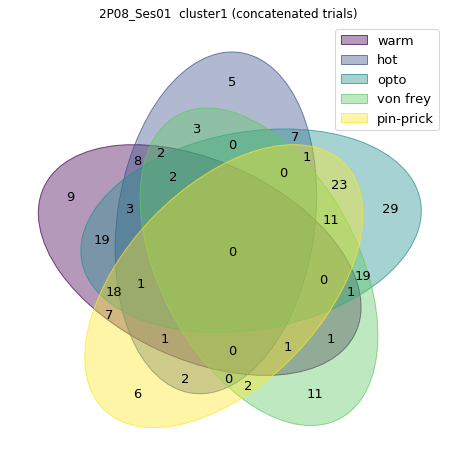

processing:  dF_F0_SHORT_2P07_Ses03.csv
2P07_Ses03


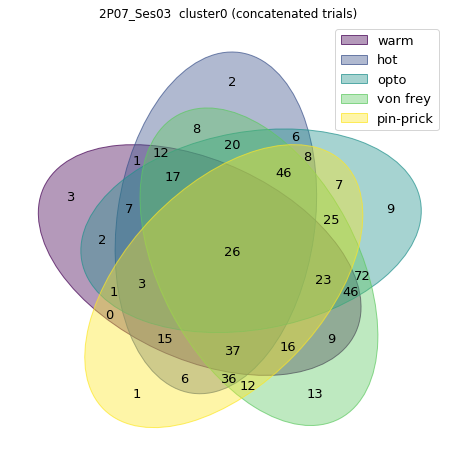

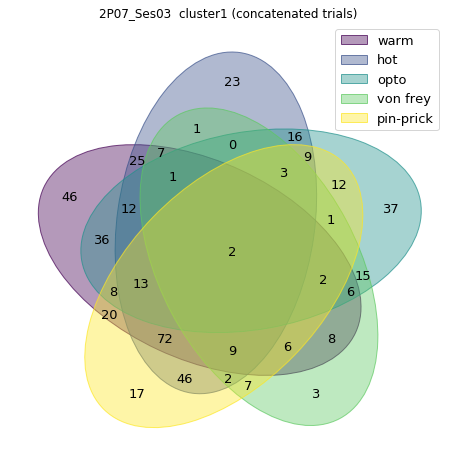

processing:  dF_F0_SHORT_2P08_Ses02.csv
2P08_Ses02


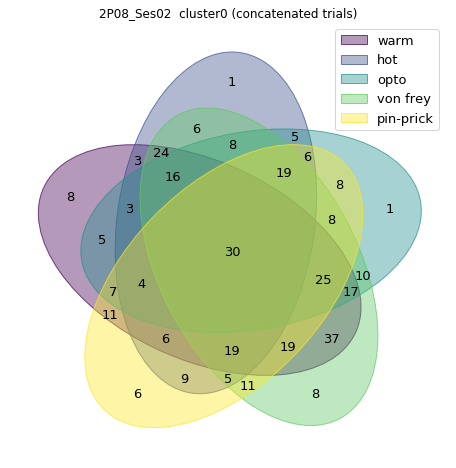

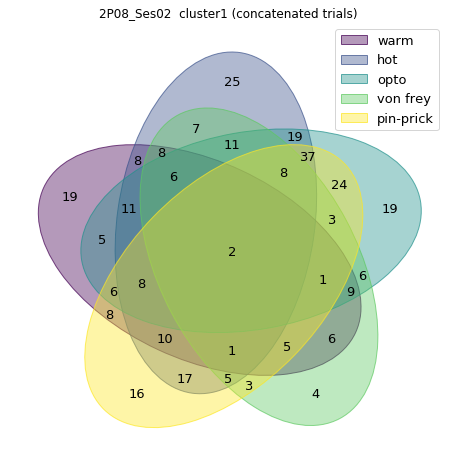

processing:  dF_F0_SHORT_2P07_Ses04.csv
2P07_Ses04


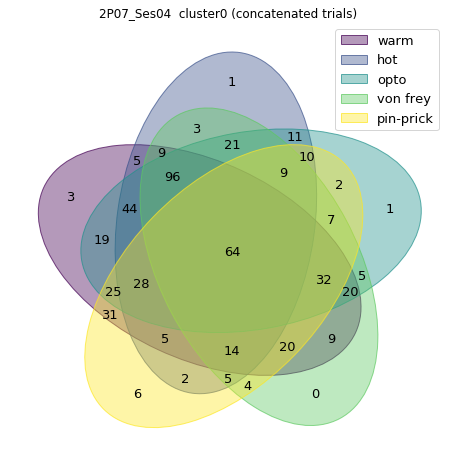

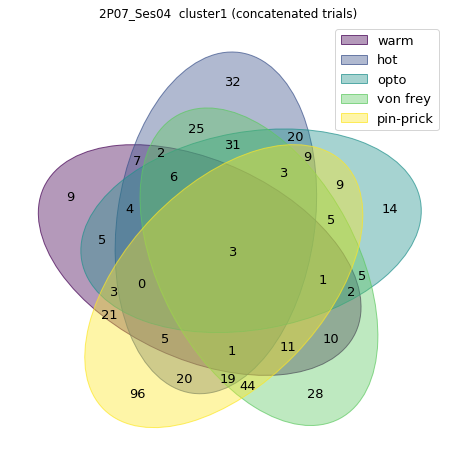

processing:  dF_F0_SHORT_2P07_Ses05.csv
2P07_Ses05


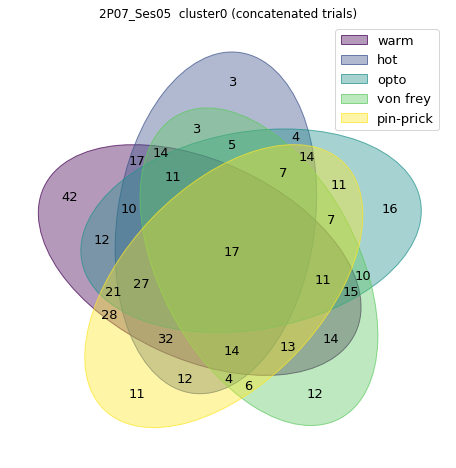

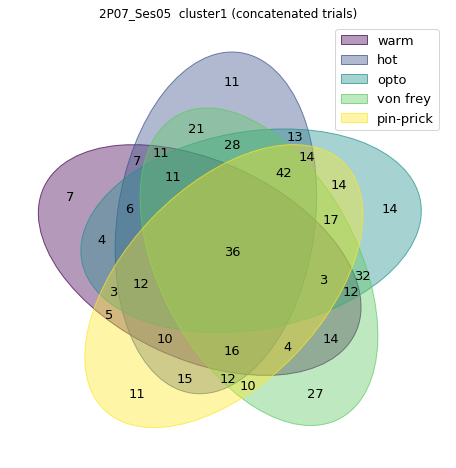

processing:  dF_F0_SHORT_2P08_Ses04.csv
2P08_Ses04


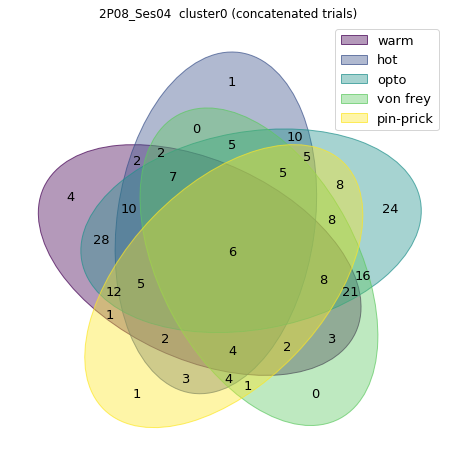

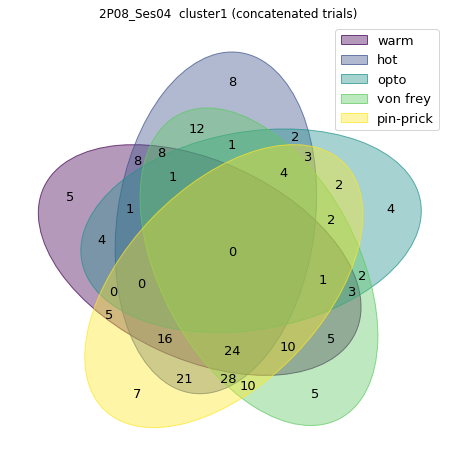

processing:  dF_F0_SHORT_2P07_Ses06.csv
2P07_Ses06


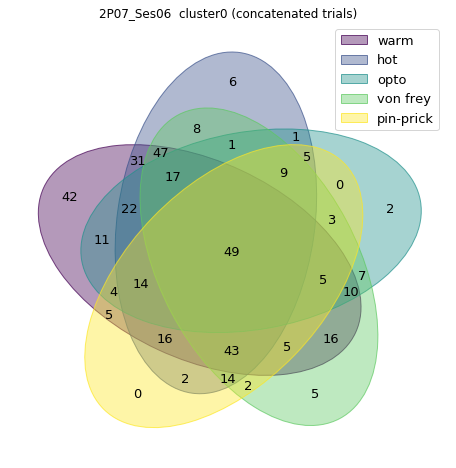

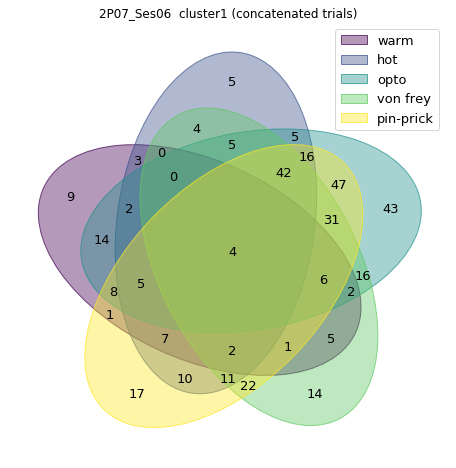

processing:  dF_F0_SHORT_2P08_Ses05.csv
2P08_Ses05


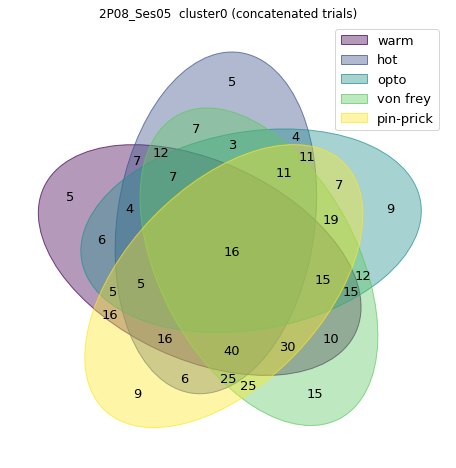

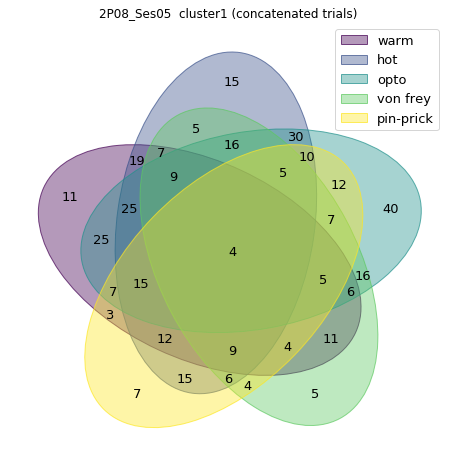

processing:  dF_F0_SHORT_2P07_Ses07.csv
2P07_Ses07


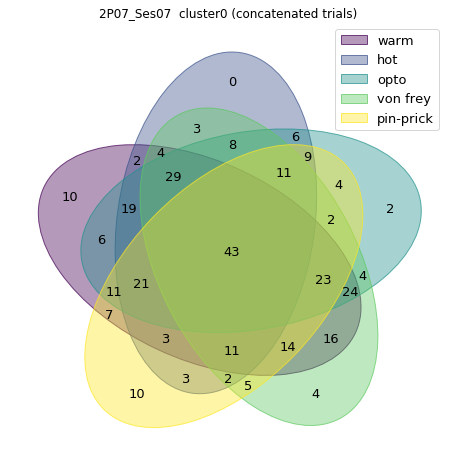

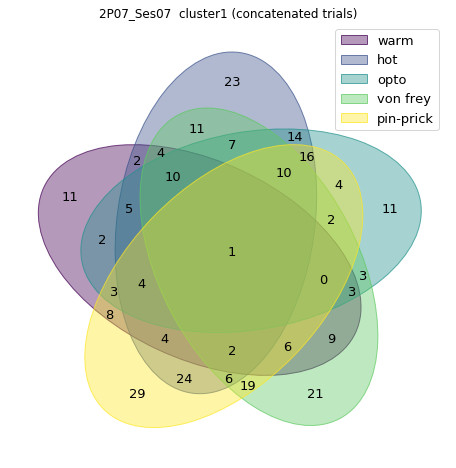

processing:  dF_F0_SHORT_2P08_Ses06.csv
2P08_Ses06


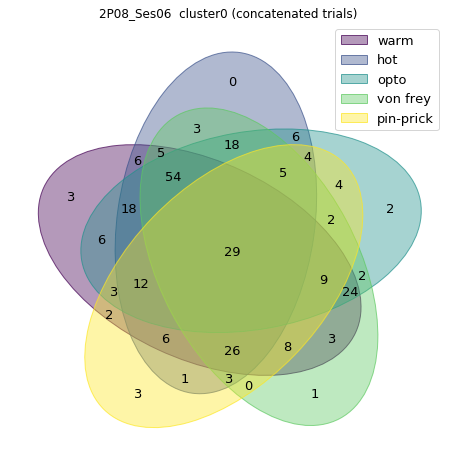

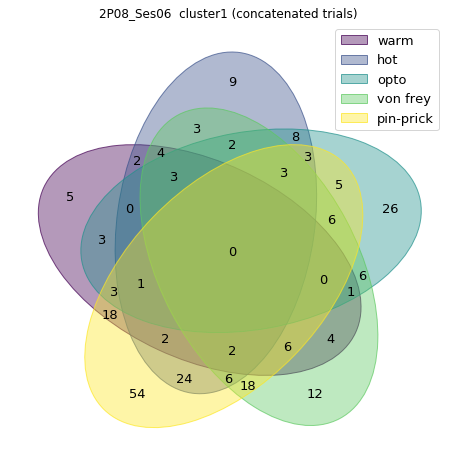

processing:  dF_F0_SHORT_2P07_CFA.csv
2P07_CFA


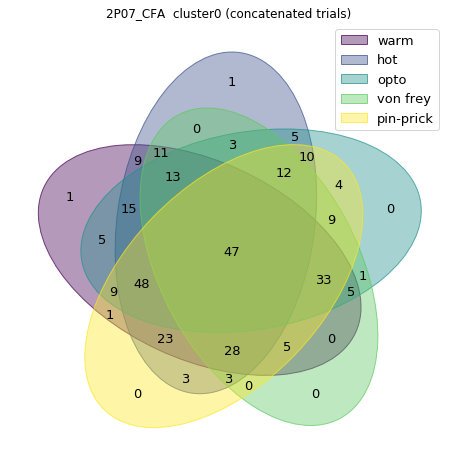

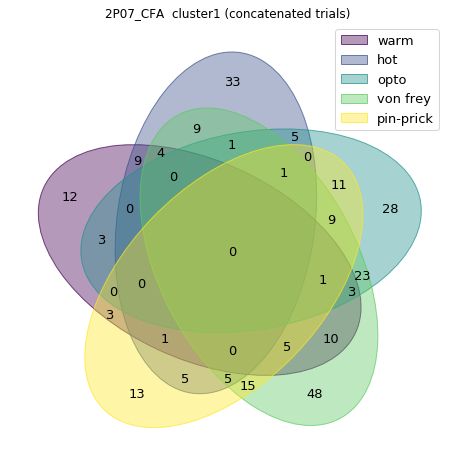

processing:  dF_F0_SHORT_2P09_Ses01.csv
2P09_Ses01


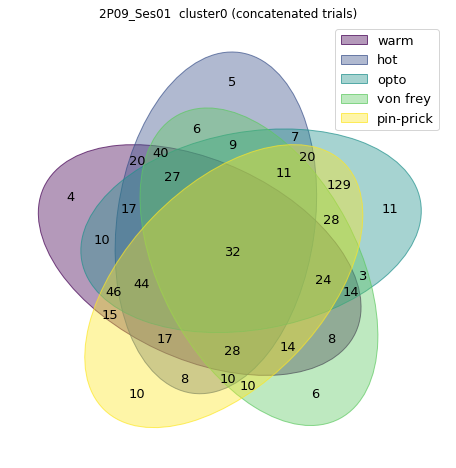

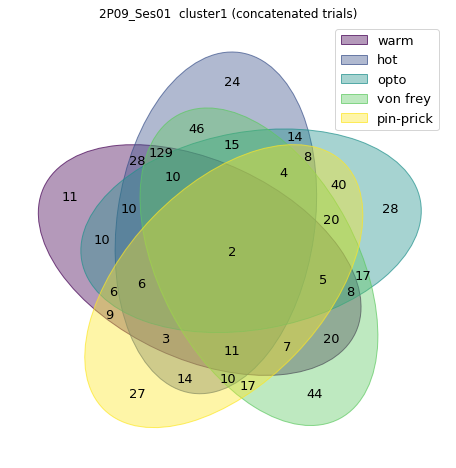

processing:  dF_F0_SHORT_2P08_CFA.csv
2P08_CFA


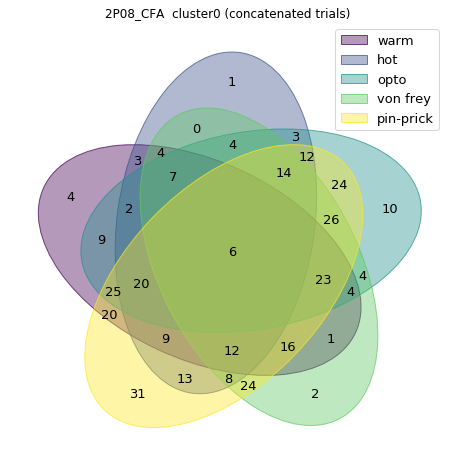

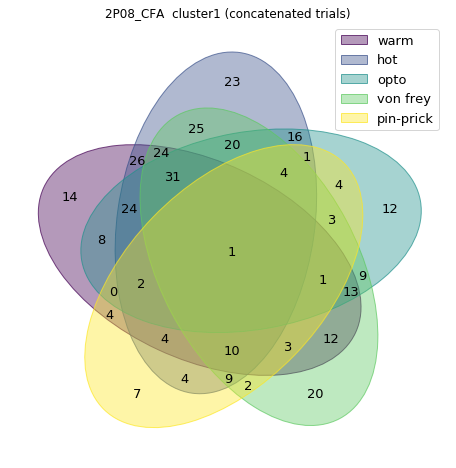

processing:  dF_F0_SHORT_2P11_Ses01.csv
2P11_Ses01


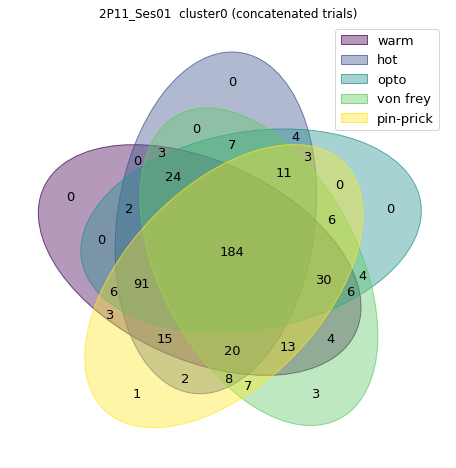

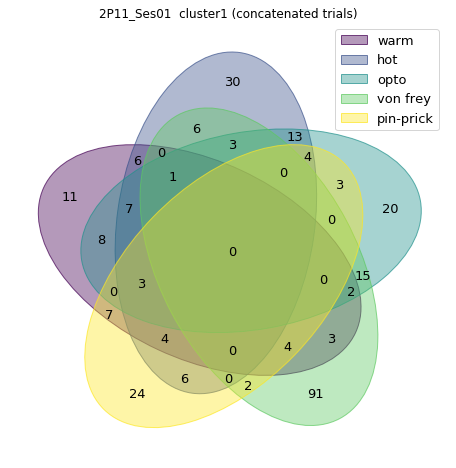

processing:  dF_F0_SHORT_2P10_Ses01.csv
2P10_Ses01


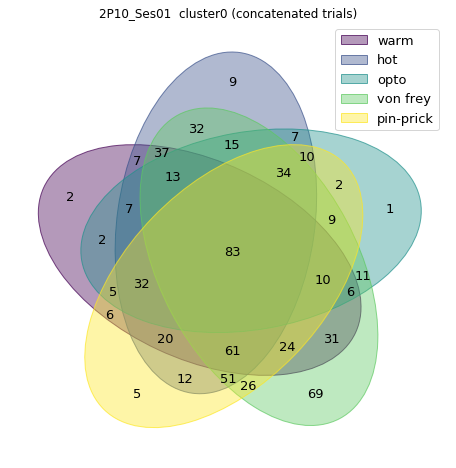

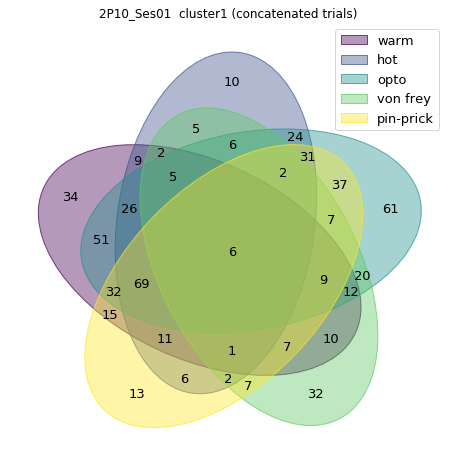

processing:  dF_F0_SHORT_2P09_Ses02.csv
2P09_Ses02


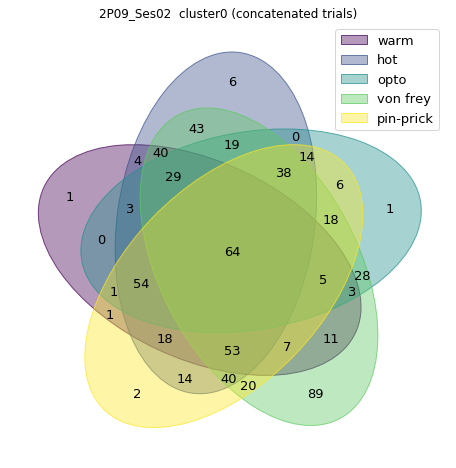

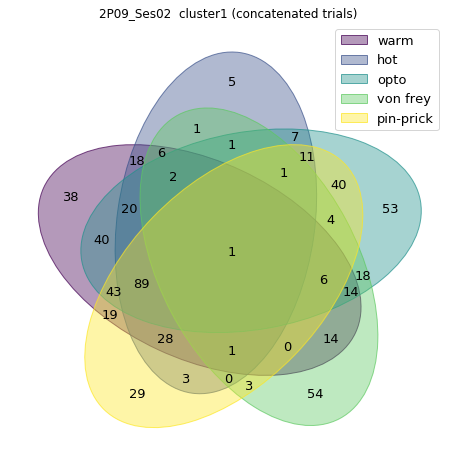

processing:  dF_F0_SHORT_2P10_Ses02.csv
2P10_Ses02


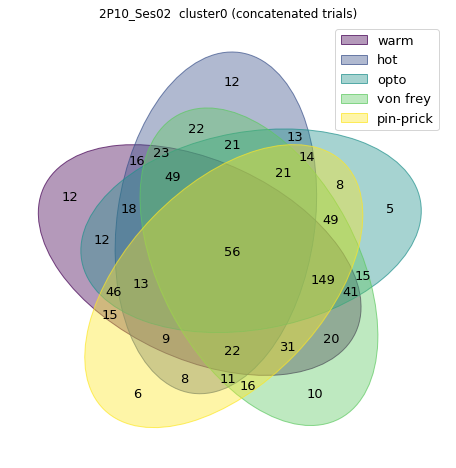

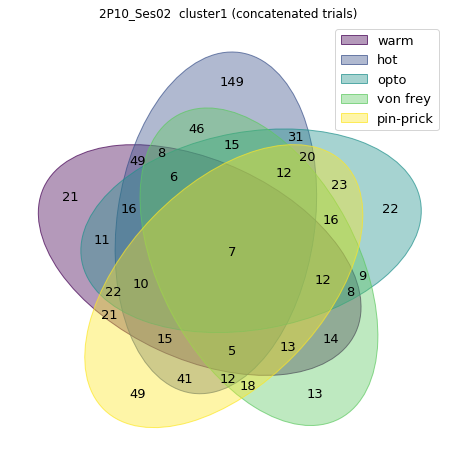

processing:  dF_F0_SHORT_2P09_Ses04.csv
2P09_Ses04


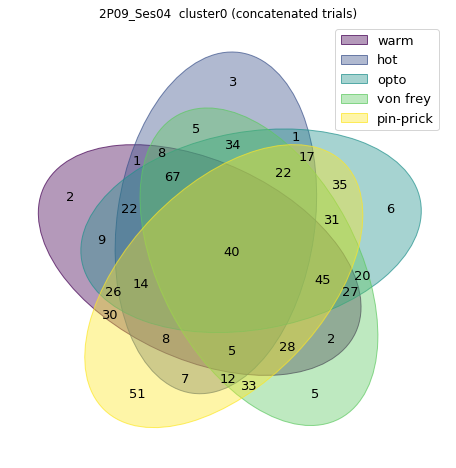

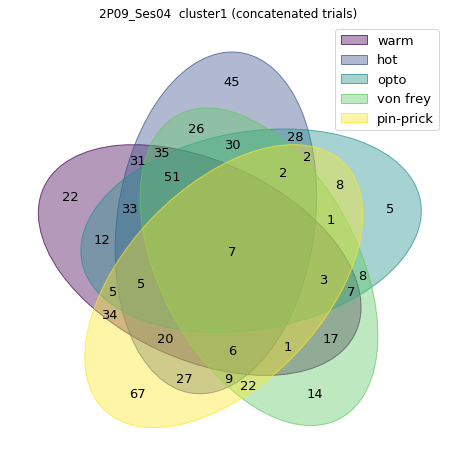

processing:  dF_F0_SHORT_2P11_Ses04.csv
2P11_Ses04


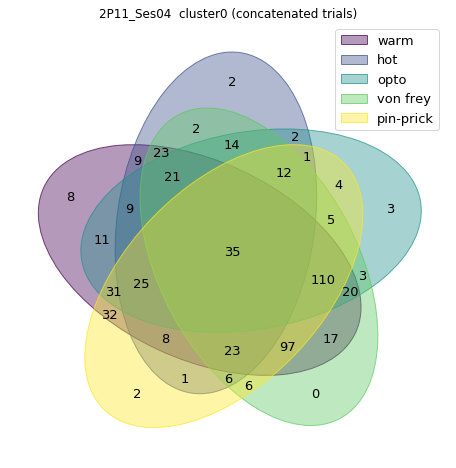

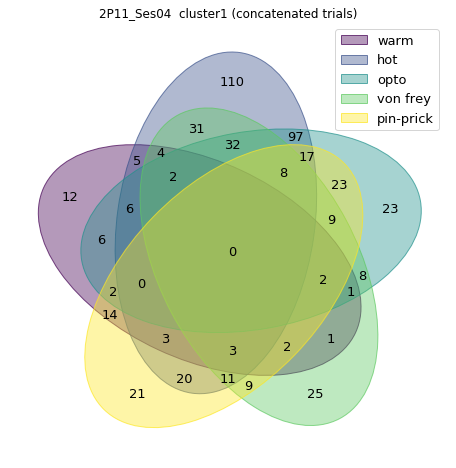

processing:  dF_F0_SHORT_2P11_Ses05.csv
2P11_Ses05


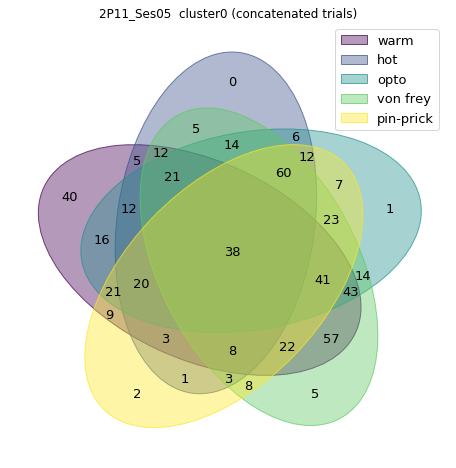

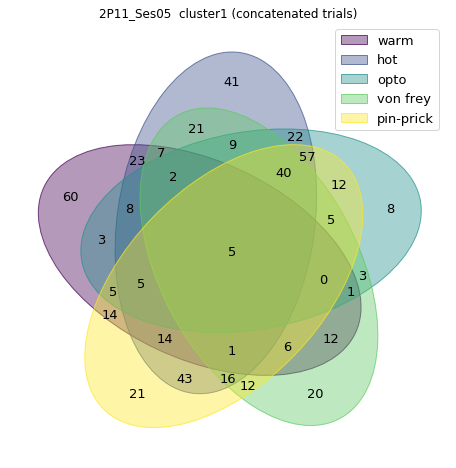

processing:  dF_F0_SHORT_2P10_CFA.csv
2P10_CFA


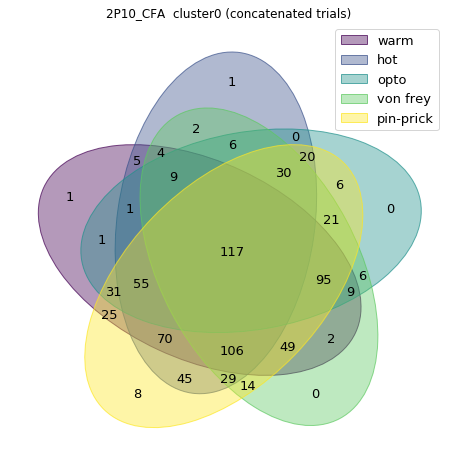

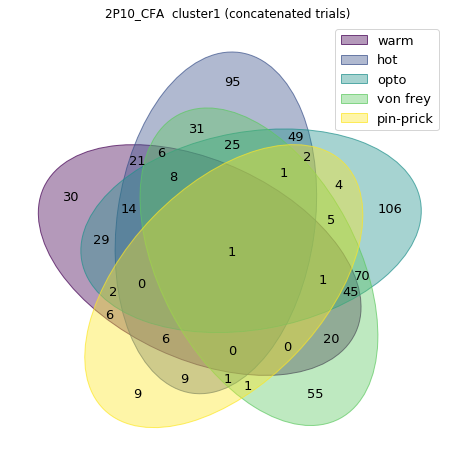

processing:  dF_F0_SHORT_2P09_CFA.csv
2P09_CFA


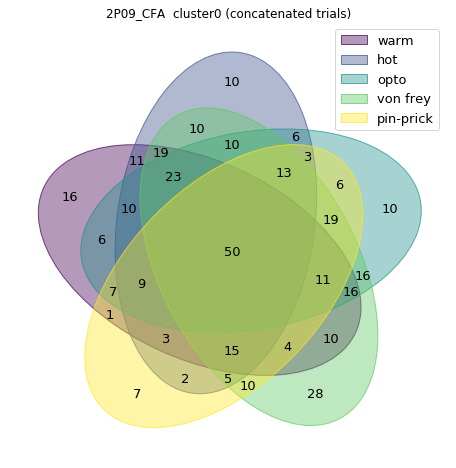

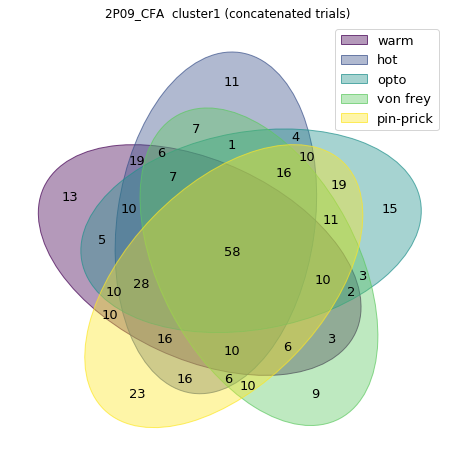

processing:  dF_F0_SHORT_2P11_Ses02.csv
2P11_Ses02


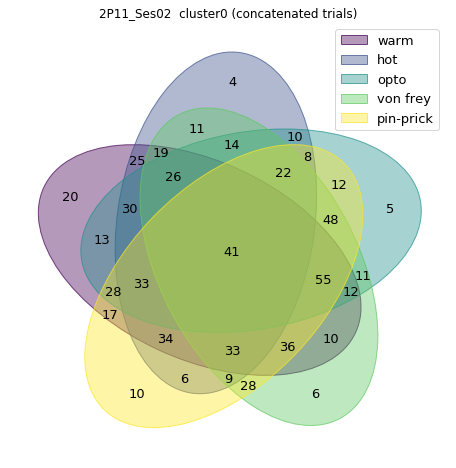

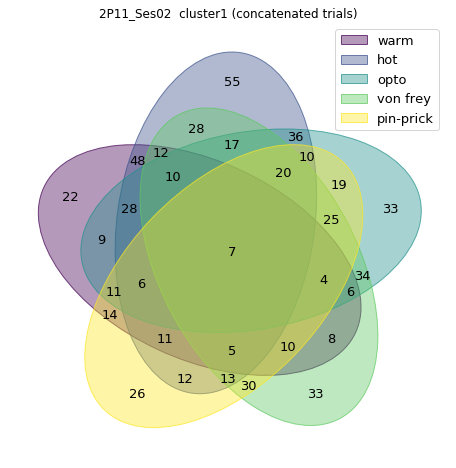

processing:  dF_F0_SHORT_2P09_Ses03.csv
2P09_Ses03


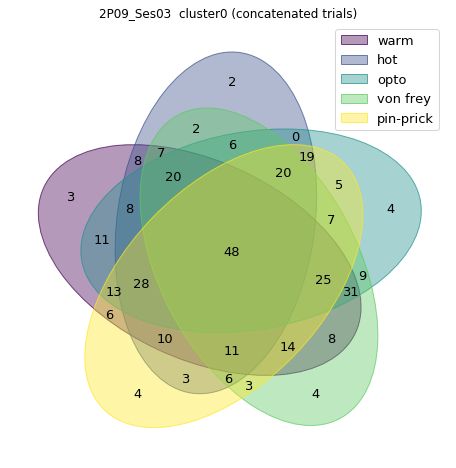

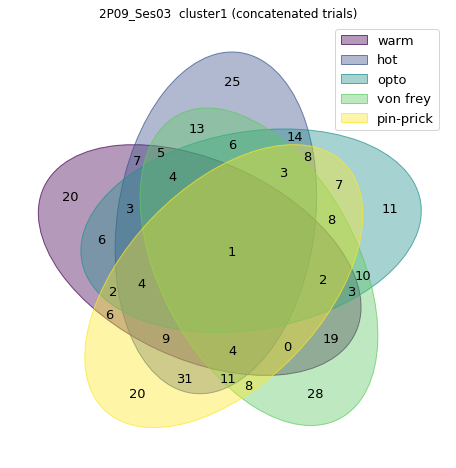

processing:  dF_F0_SHORT_2P10_Ses03.csv
2P10_Ses03


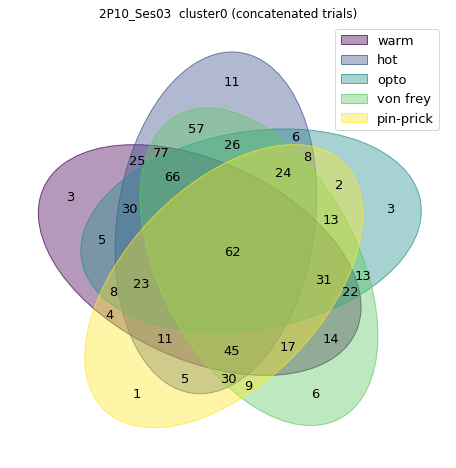

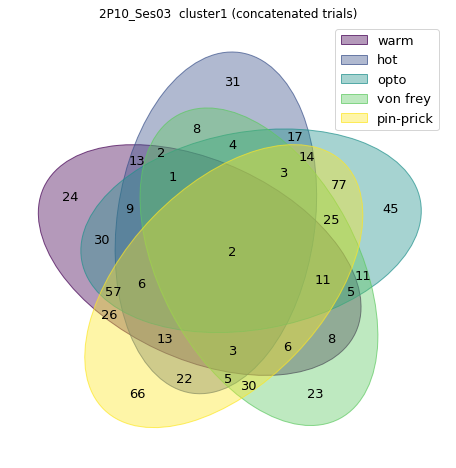

processing:  dF_F0_SHORT_2P10_Ses04.csv
2P10_Ses04


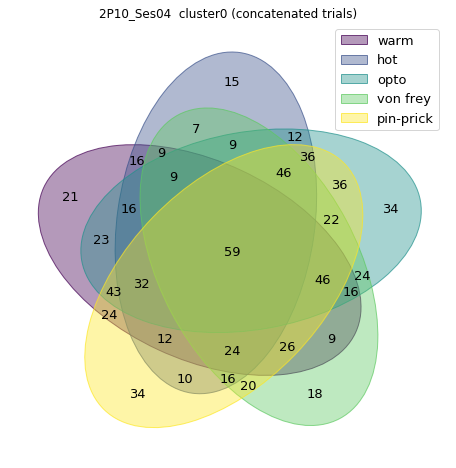

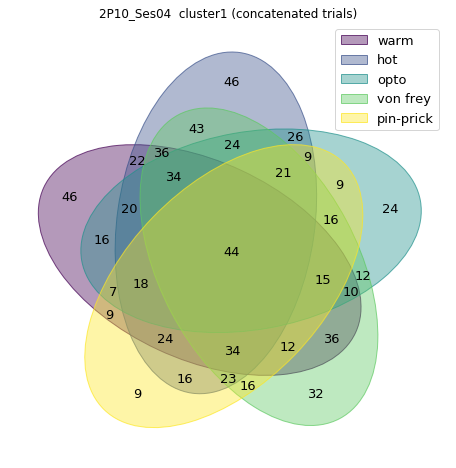

processing:  dF_F0_SHORT_2P09_Ses05.csv
2P09_Ses05


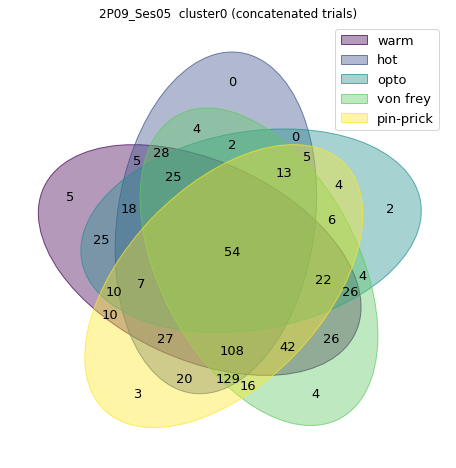

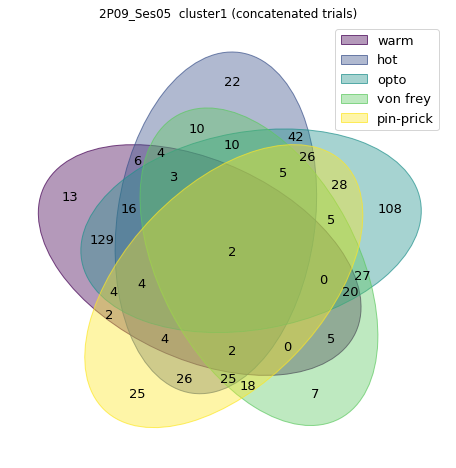

processing:  dF_F0_SHORT_2P10_Ses05.csv
2P10_Ses05


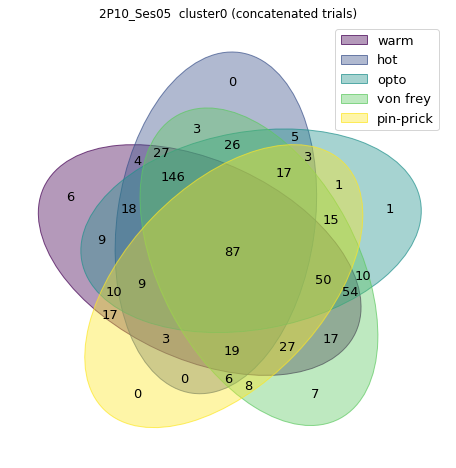

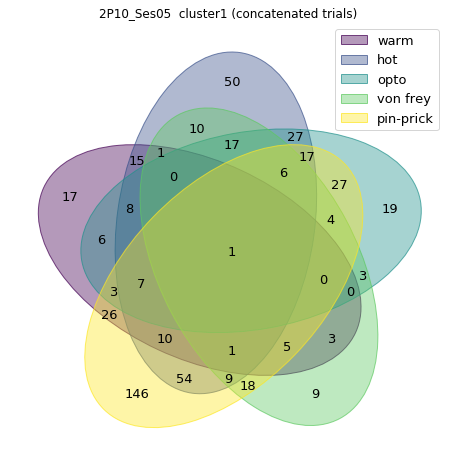

processing:  dF_F0_SHORT_2P11_Ses06.csv
2P11_Ses06


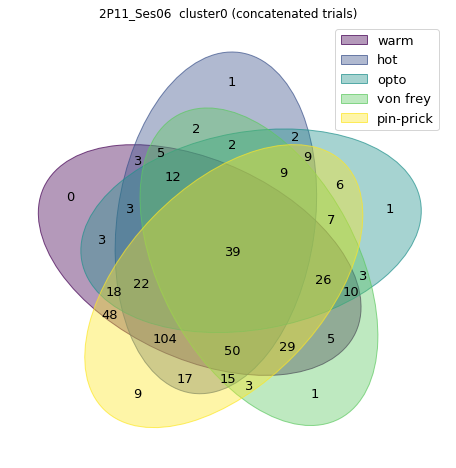

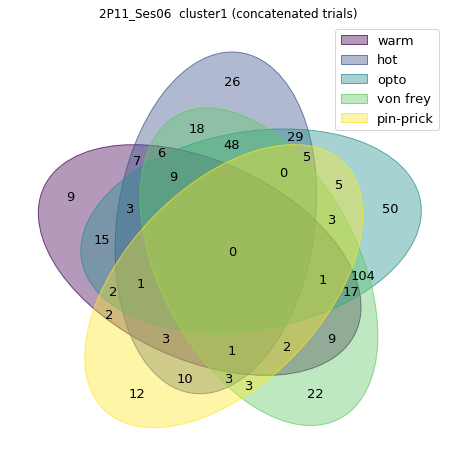

processing:  dF_F0_SHORT_2P11_CFA.csv
2P11_CFA


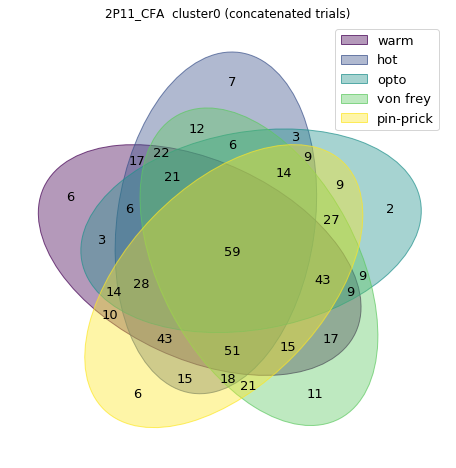

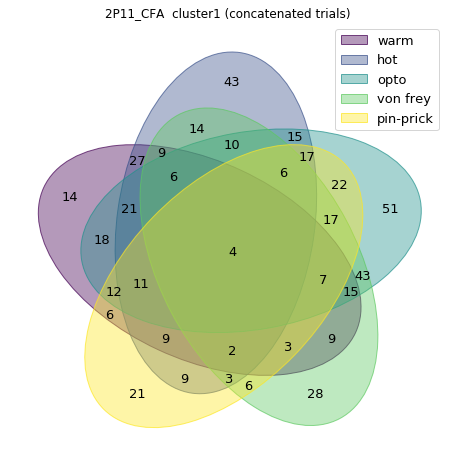

processing:  dF_F0_SHORT_2P05_Ses03.csv
2P05_Ses03


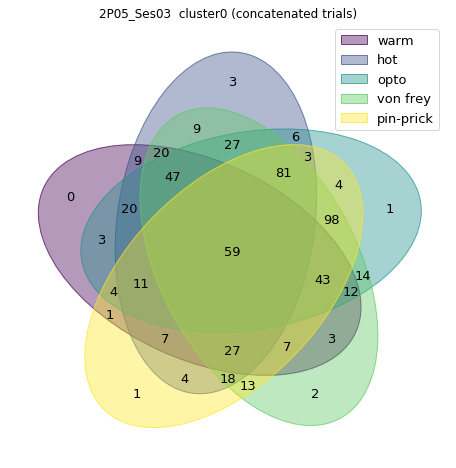

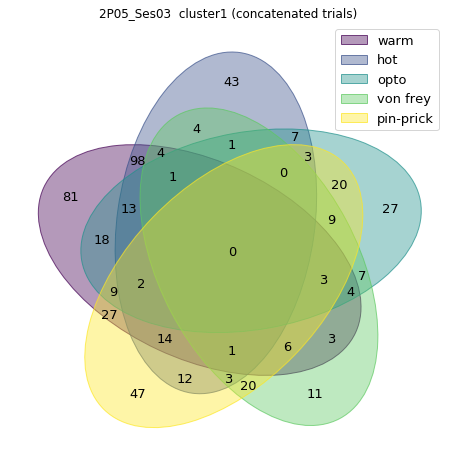

In [43]:
# COMPUTE PAIR-WISE CORRELATIONS FOR EACH SESSION AND STIMULUS
session_names = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    for s in stimuli:
        trial_means = []
        cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
        modality = cells[cells['identifier'].str.contains(str((s)))]
        modality = modality.reset_index(drop=True)
        trials = modality['identifier'].unique()
        
        #for cid in cell_ids[:-1]:
            #repli_traces = pd.DataFrame()
            
            #for t in trials:
                #trace_idx = modality[modality['identifier'].str.contains(str(t))].index.tolist()
                #trace = modality[cid]
                #temp_trace = trace.loc[trace_idx[0]:trace_idx[-1]]
                #temp_trace = temp_trace.reset_index(drop=True)
                #repli_traces[t] = temp_trace
            
            #trial_means.append(repli_traces.mean(axis=1))
            
        #mean_matrix = pd.DataFrame(trial_means, columns=cols)
        
        # calculate and plot pair-wise correlation of concatenated trials for each cell by modality
        modality = modality.drop('identifier', axis=1)
        corr_trials = modality.corr().values
        g = sns.clustermap(corr_trials, method = 'ward', robust=True, rasterized = True)
        g.fig.suptitle(ses_name + ' ' + s+'_concatenated trials')
        #plt.savefig(os.path.join(output_path, ses_name +'_'+s+'_pair-wise_corr_concat_trials_ward.png'))
        plt.close()
        
        cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward',compute_distances=True)
        cfit = cluster.fit_predict(corr_trials)
        dist = cluster.distances_
        clusters[s] = cfit
        
        
        # calculate and plot pair-wise correlation of trial means for each cell by modality
        #corr_means = mean_matrix.T.corr().values
        #g = sns.clustermap(corr_means, method = 'ward', robust=True, rasterized = True)
        #col_order = g.dendrogram_col.reordered_ind
        #g.fig.suptitle(ses_name + ' ' + s+'_trial means_ward')
        #plt.show()
        #plt.savefig(os.path.join(output_path, ses_name +'_'+s+'_pair-wise_corr_trial_means_ward.png'))
        
        #mean_m = mean_matrix.drop('cell', axis=1)
        #cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward', compute_distances=True)
        #cfit = cluster.fit_predict(corr_means)
        #mean_matrix['cell'] = cell_ids[:-1]
        #mean_matrix['cluster'] = cfit
        #clusters[s] = cfit
        #mean_matrix.to_csv(os.path.join(output_path, ses_name +'_'+ s +'_mean_matrix_3sec.csv'))
        #plt.close()
        
    clusters.to_csv(os.path.join(output_path, ses_name + '_clusters_3sec_ward.csv'))
    
    # Make Venn diagrams for each cluster and modality
    %matplotlib inline

    cluster0 = dict([('warm', set(clusters[clusters['warm']==0]['cell'])), 
                 ('hot', set(clusters[clusters['hot']==0]['cell'])),
                 ('opto',set(clusters[clusters['opto']==0]['cell'])),
                 ('von frey', set(clusters[clusters['von frey']==0]['cell'])),
                 ('pin-prick', set(clusters[clusters['pin-prick']==0]['cell']))
                 ])

    clust0 = venn(cluster0)
    plt.title(ses_name + ' ' +' cluster0 (concatenated trials)')
    plt.savefig(os.path.join(output_path, ses_name +'_'+'venn0.png'))
    plt.show()

    cluster1 = dict([('warm', set(clusters[clusters['warm']==1]['cell'])), 
                 ('hot', set(clusters[clusters['hot']==1]['cell'])),
                 ('opto',set(clusters[clusters['opto']==1]['cell'])),
                 ('von frey', set(clusters[clusters['von frey']==1]['cell'])),
                 ('pin-prick', set(clusters[clusters['pin-prick']==1]['cell']))
                 ])

    clust1 = venn(cluster1)
    plt.title(ses_name + ' ' +' cluster1 (concatenated trials)')
    plt.savefig(os.path.join(output_path, ses_name +'_'+'_venn1.png'))   
    plt.show()
    

processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01


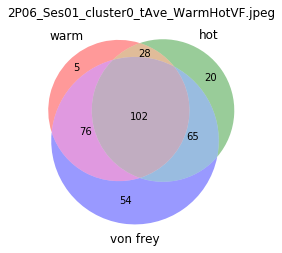

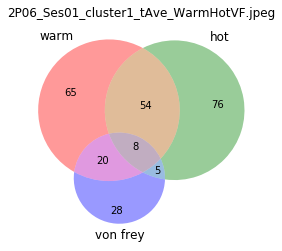

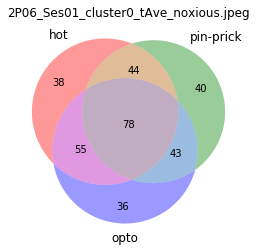

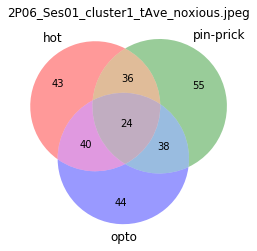

processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02


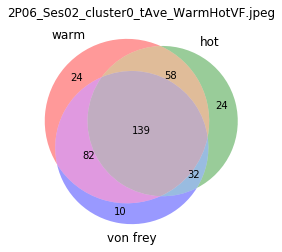

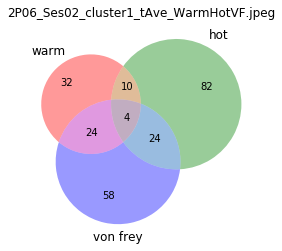

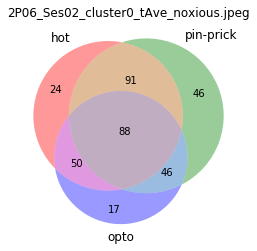

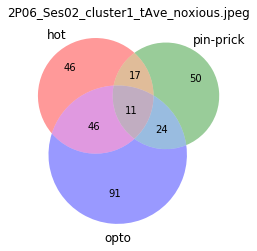

processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03


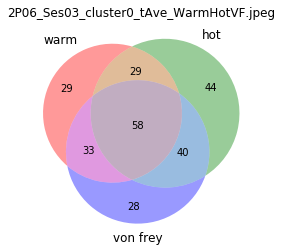

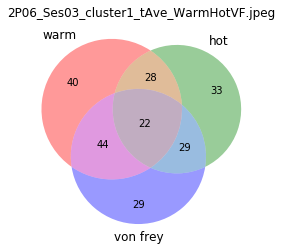

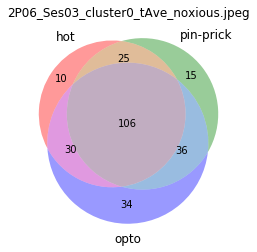

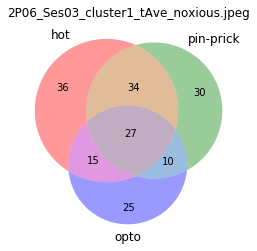

processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04


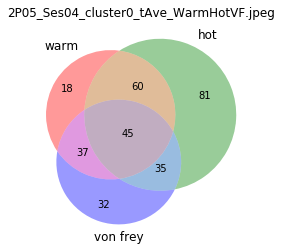

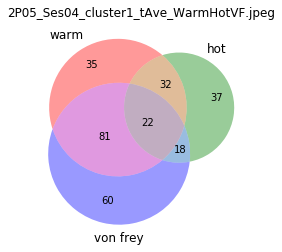

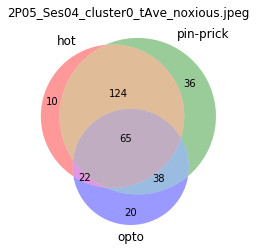

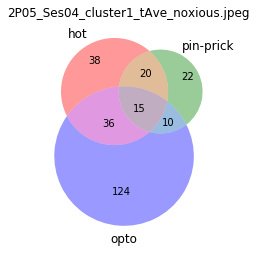

processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04


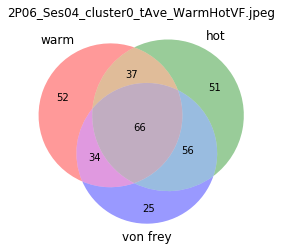

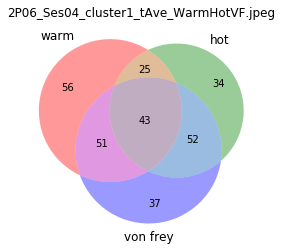

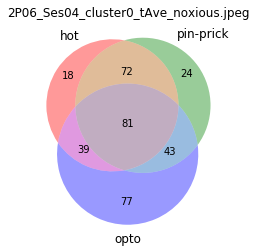

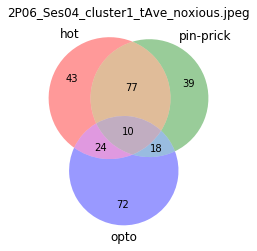

processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05


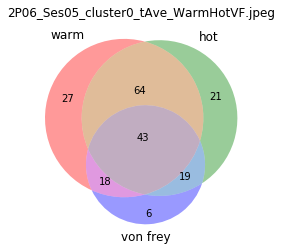

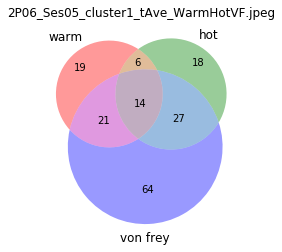

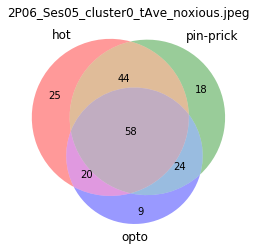

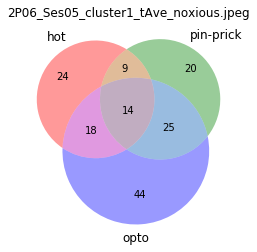

processing:  dF_F0_SHORT_2P05_Ses06.csv
2P05_Ses06


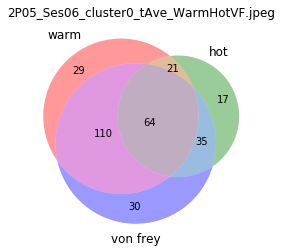

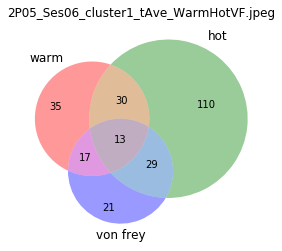

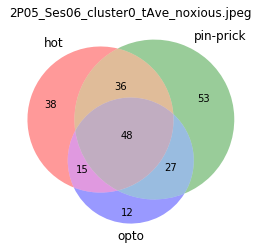

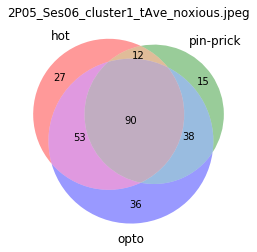

processing:  dF_F0_SHORT_2P06_Ses06.csv
2P06_Ses06


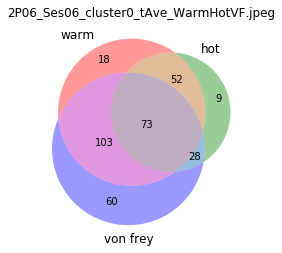

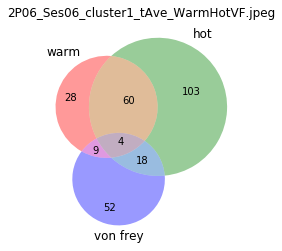

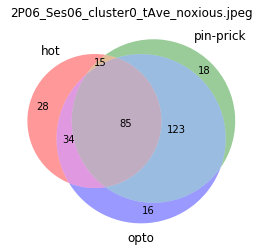

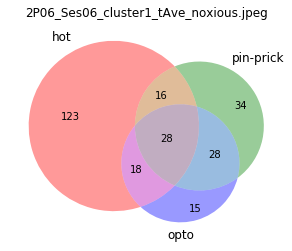

processing:  dF_F0_SHORT_2P05_Ses07.csv
2P05_Ses07


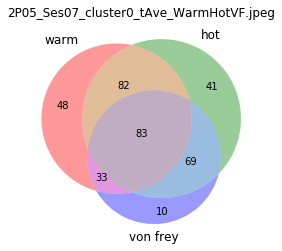

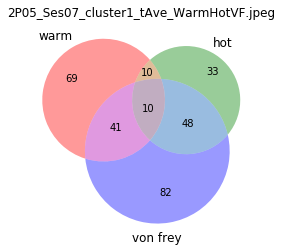

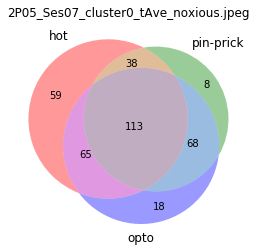

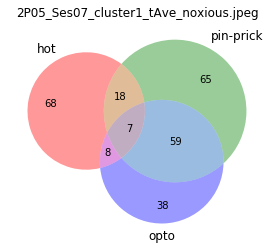

processing:  dF_F0_SHORT_2P06_Ses07.csv
2P06_Ses07


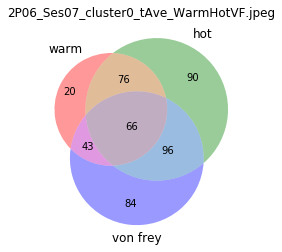

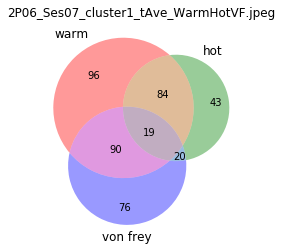

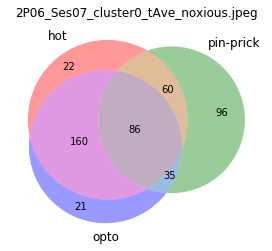

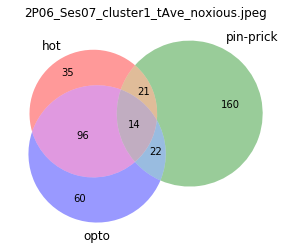

processing:  dF_F0_SHORT_2P07_Ses01.csv
2P07_Ses01


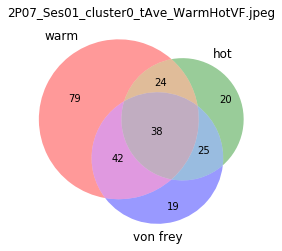

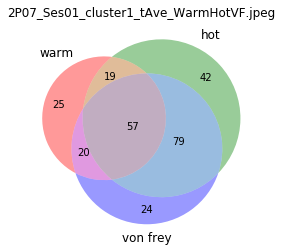

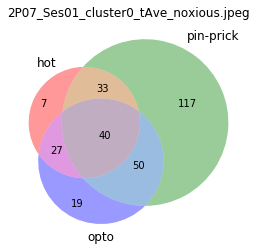

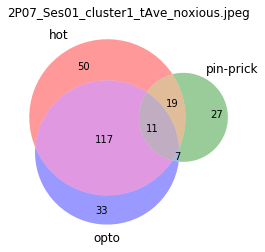

processing:  dF_F0_SHORT_2P08_Ses01.csv
2P08_Ses01


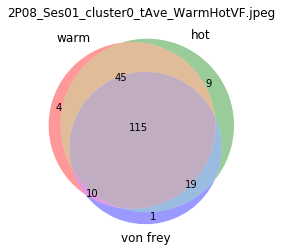

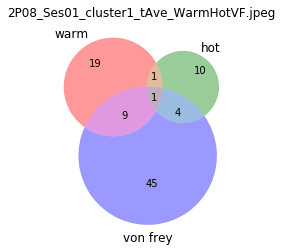

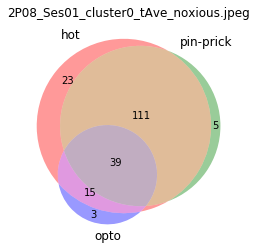

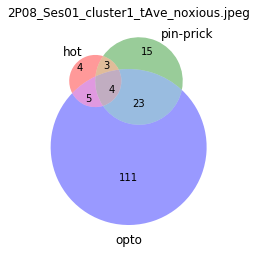

processing:  dF_F0_SHORT_2P07_Ses03.csv
2P07_Ses03


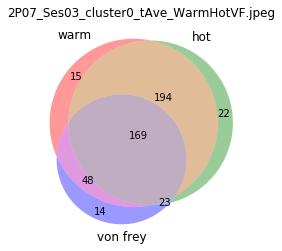

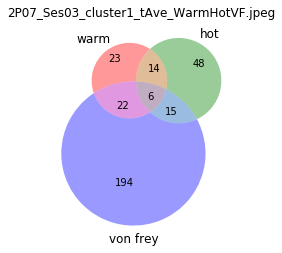

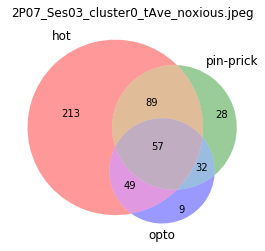

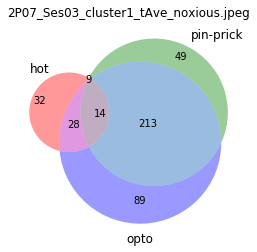

processing:  dF_F0_SHORT_2P08_Ses02.csv
2P08_Ses02


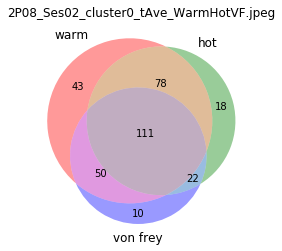

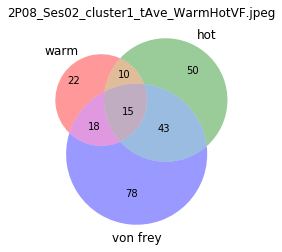

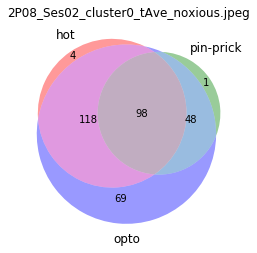

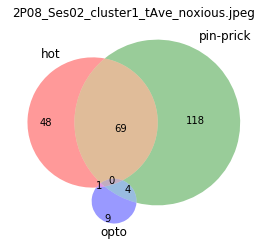

processing:  dF_F0_SHORT_2P07_Ses04.csv
2P07_Ses04


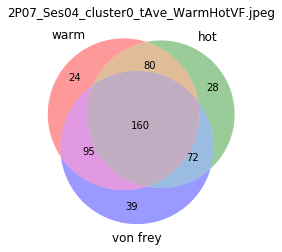

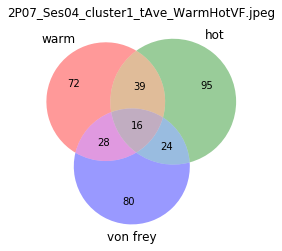

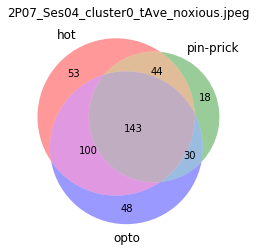

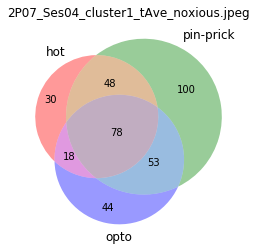

processing:  dF_F0_SHORT_2P07_Ses05.csv
2P07_Ses05


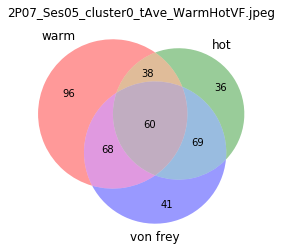

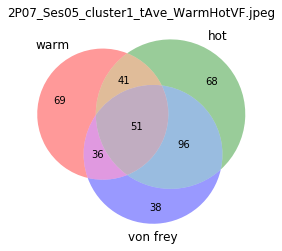

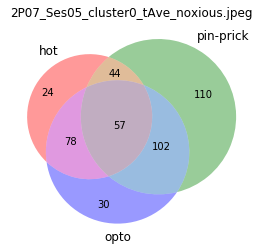

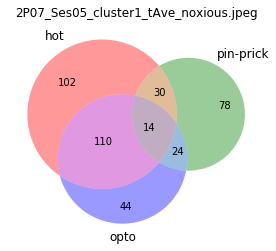

processing:  dF_F0_SHORT_2P08_Ses04.csv
2P08_Ses04


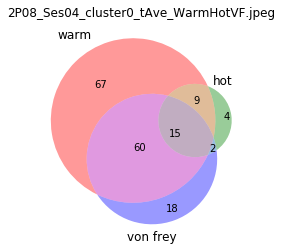

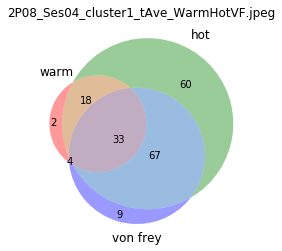

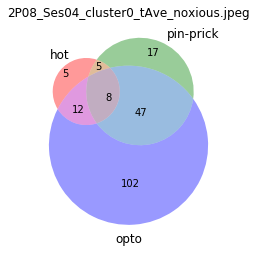

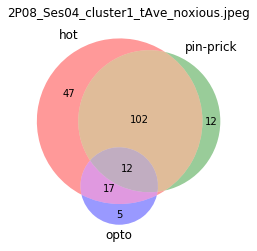

processing:  dF_F0_SHORT_2P07_Ses06.csv
2P07_Ses06


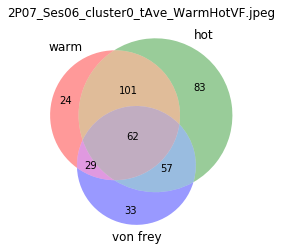

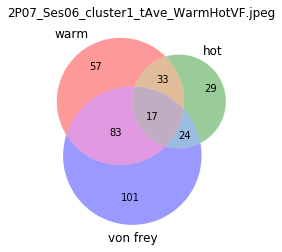

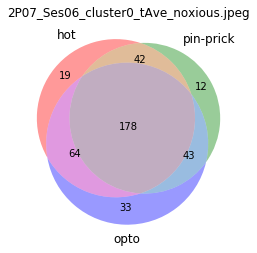

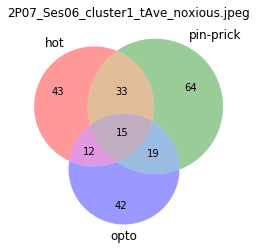

processing:  dF_F0_SHORT_2P08_Ses05.csv
2P08_Ses05


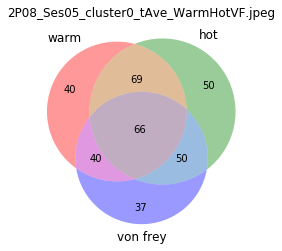

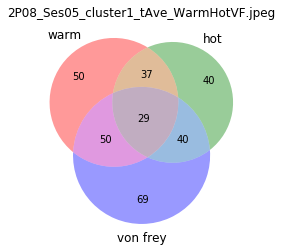

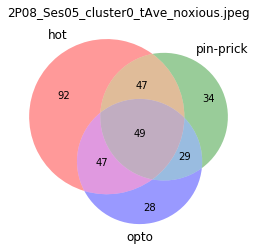

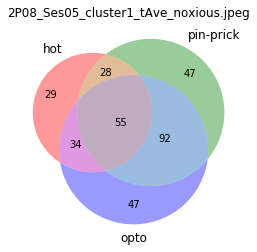

processing:  dF_F0_SHORT_2P07_Ses07.csv
2P07_Ses07


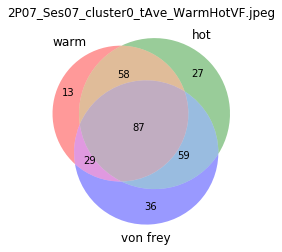

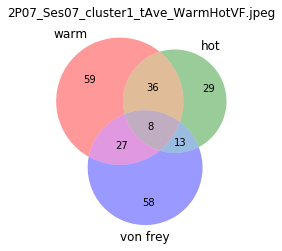

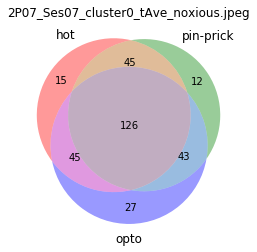

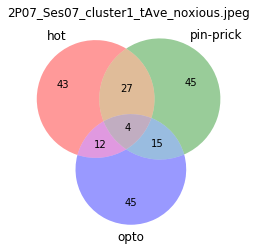

processing:  dF_F0_SHORT_2P08_Ses06.csv
2P08_Ses06


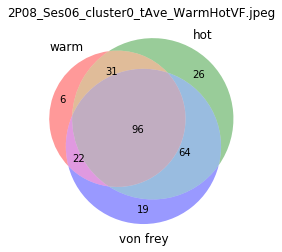

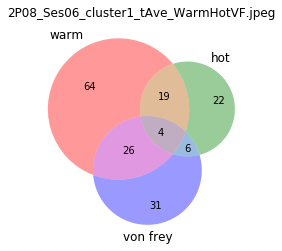

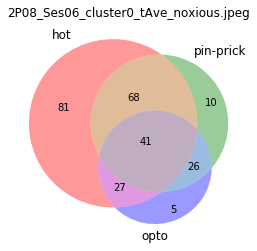

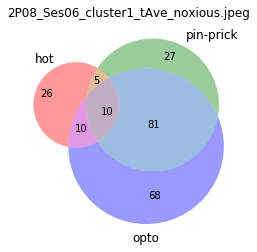

processing:  dF_F0_SHORT_2P07_CFA.csv
2P07_CFA


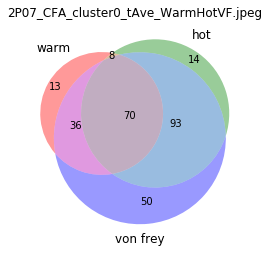

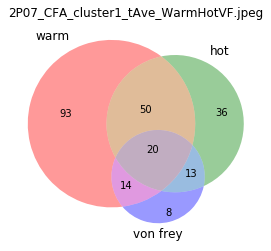

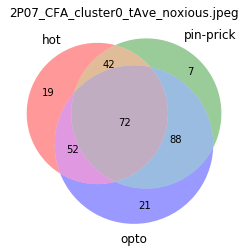

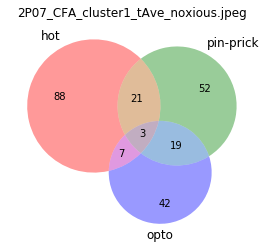

processing:  dF_F0_SHORT_2P09_Ses01.csv
2P09_Ses01


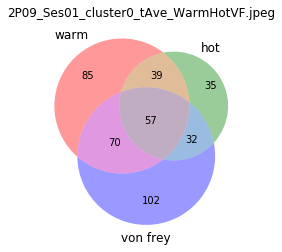

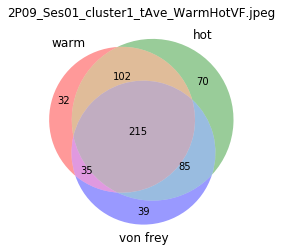

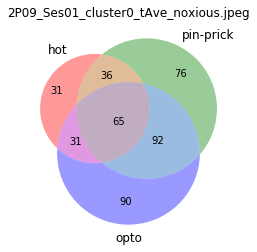

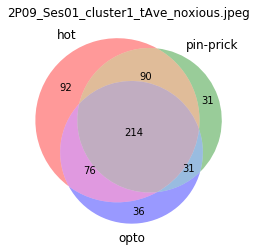

processing:  dF_F0_SHORT_2P08_CFA.csv
2P08_CFA


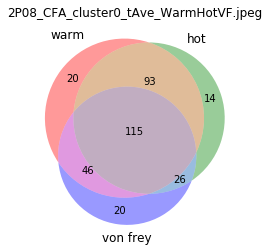

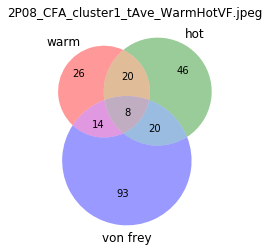

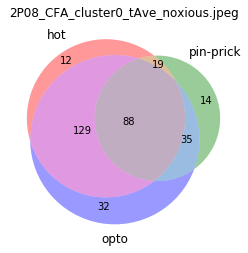

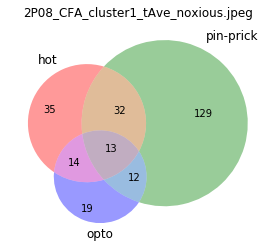

processing:  dF_F0_SHORT_2P11_Ses01.csv
2P11_Ses01


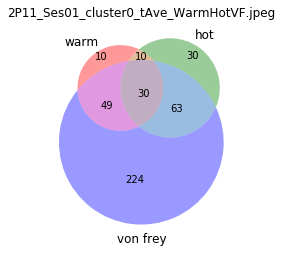

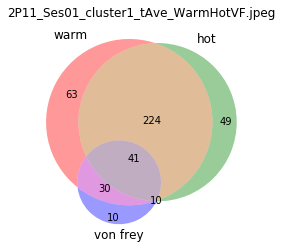

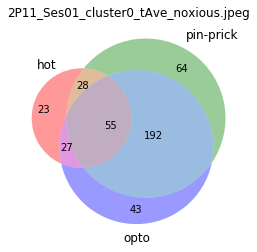

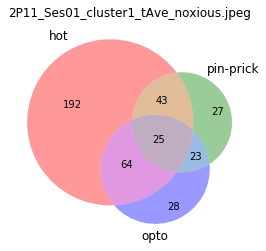

processing:  dF_F0_SHORT_2P10_Ses01.csv
2P10_Ses01


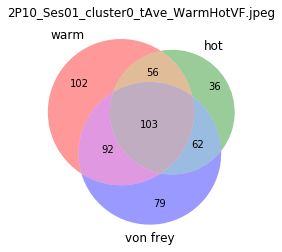

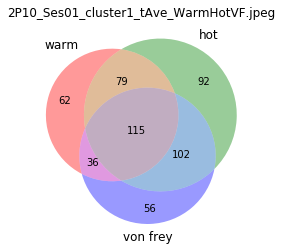

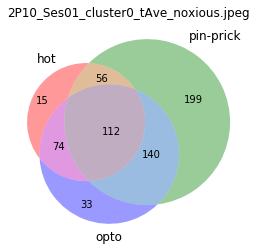

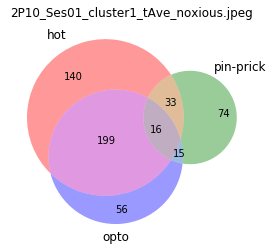

processing:  dF_F0_SHORT_2P09_Ses02.csv
2P09_Ses02


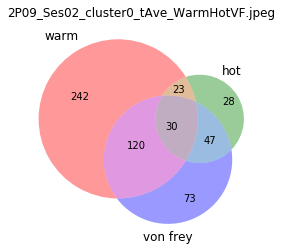

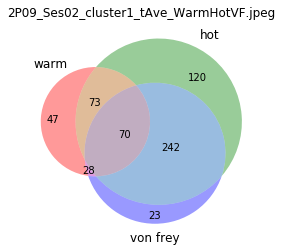

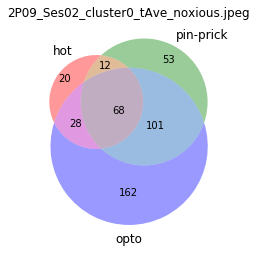

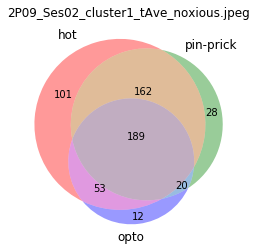

processing:  dF_F0_SHORT_2P10_Ses02.csv
2P10_Ses02


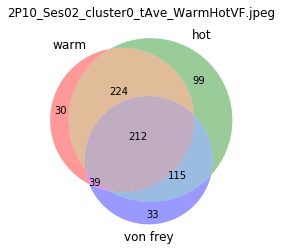

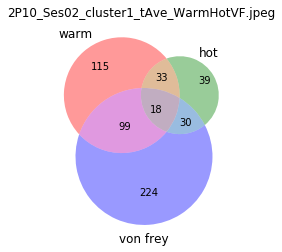

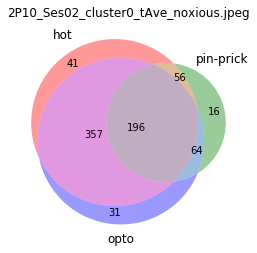

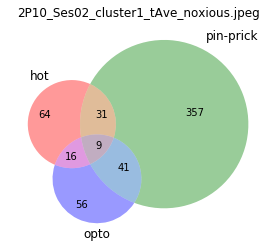

processing:  dF_F0_SHORT_2P09_Ses04.csv
2P09_Ses04


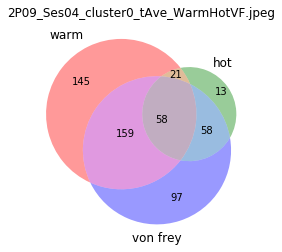

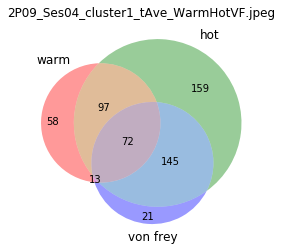

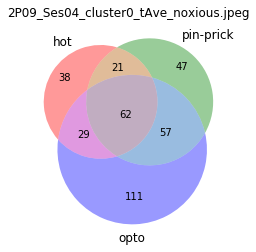

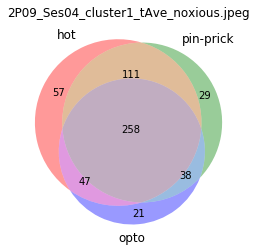

processing:  dF_F0_SHORT_2P11_Ses04.csv
2P11_Ses04


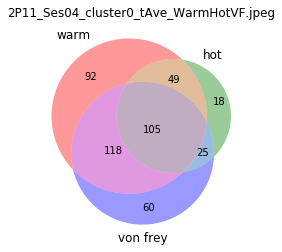

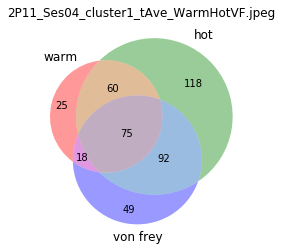

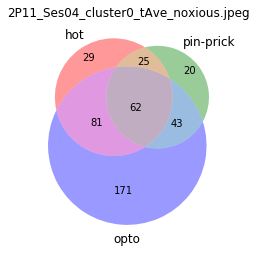

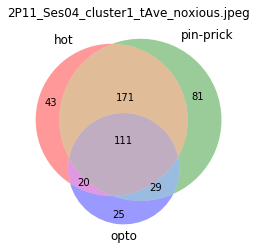

processing:  dF_F0_SHORT_2P11_Ses05.csv
2P11_Ses05


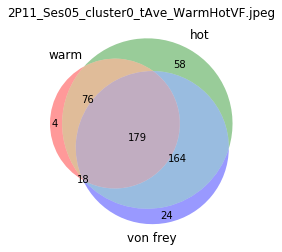

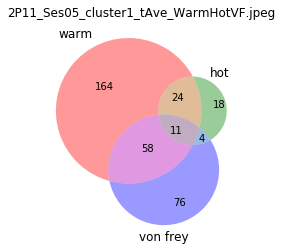

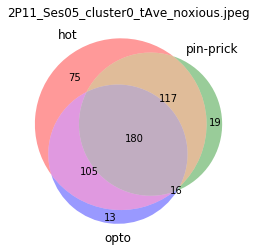

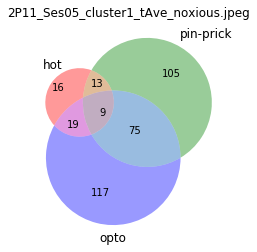

processing:  dF_F0_SHORT_2P10_CFA.csv
2P10_CFA


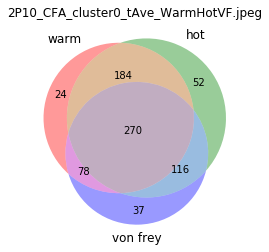

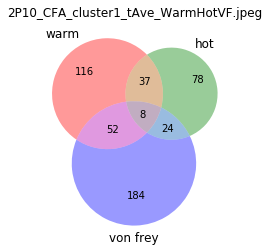

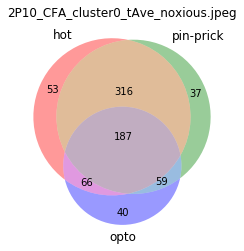

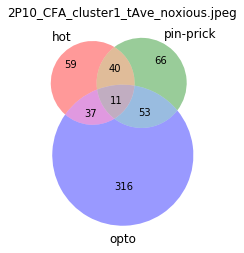

processing:  dF_F0_SHORT_2P09_CFA.csv
2P09_CFA


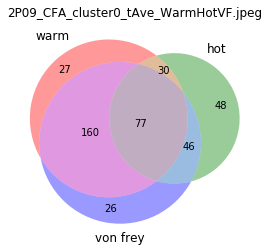

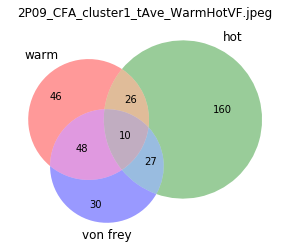

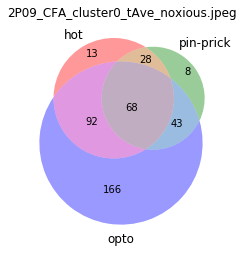

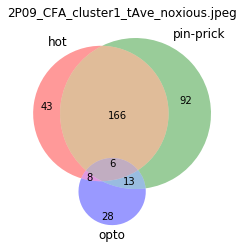

processing:  dF_F0_SHORT_2P11_Ses02.csv
2P11_Ses02


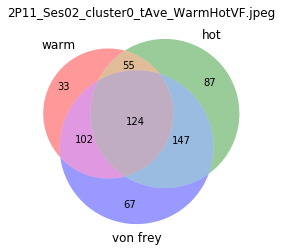

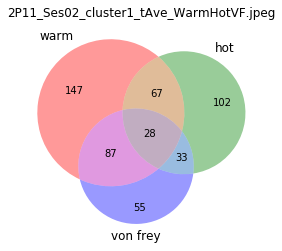

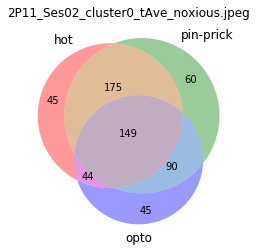

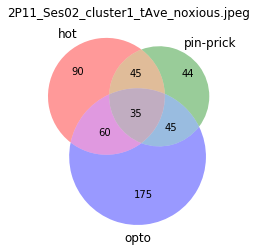

processing:  dF_F0_SHORT_2P09_Ses03.csv
2P09_Ses03


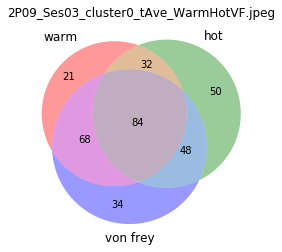

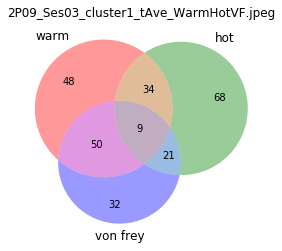

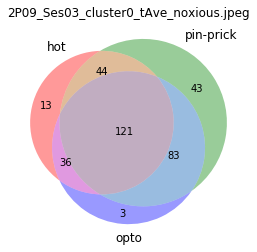

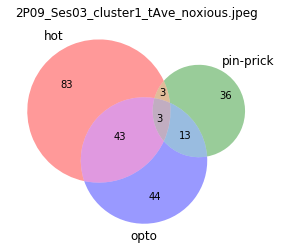

processing:  dF_F0_SHORT_2P10_Ses03.csv
2P10_Ses03


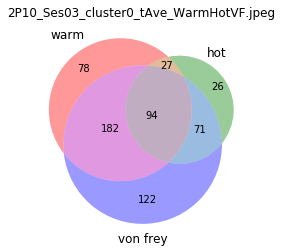

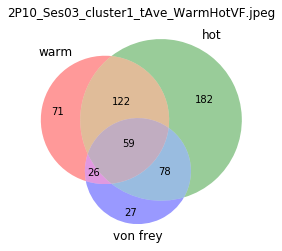

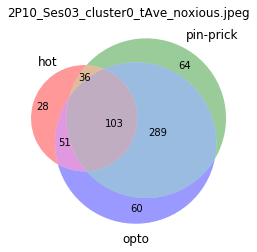

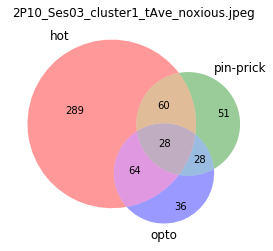

processing:  dF_F0_SHORT_2P10_Ses04.csv
2P10_Ses04


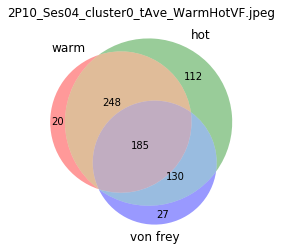

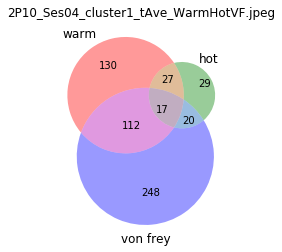

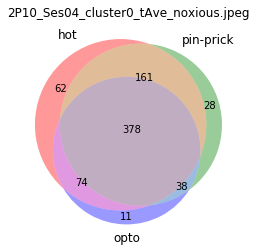

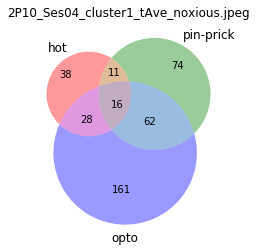

processing:  dF_F0_SHORT_2P09_Ses05.csv
2P09_Ses05


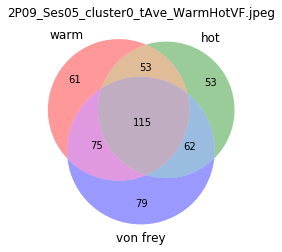

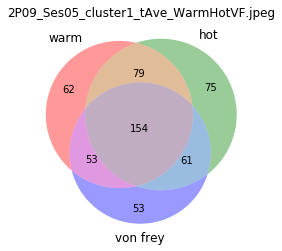

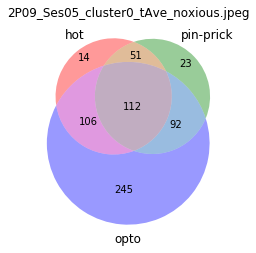

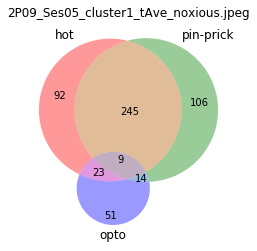

processing:  dF_F0_SHORT_2P10_Ses05.csv
2P10_Ses05


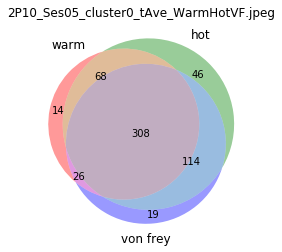

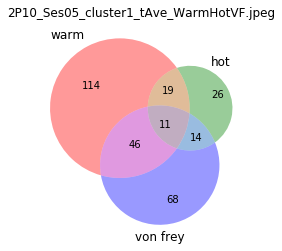

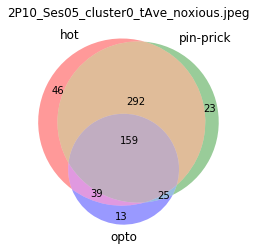

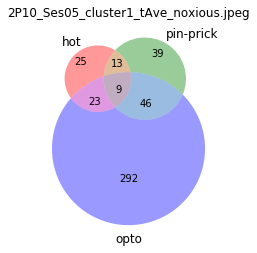

processing:  dF_F0_SHORT_2P11_Ses06.csv
2P11_Ses06


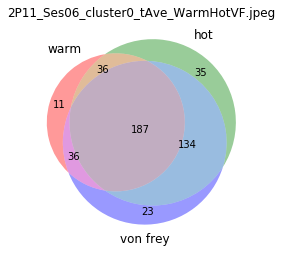

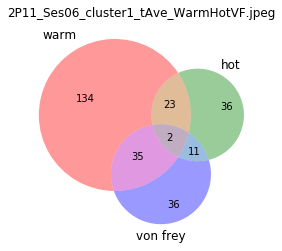

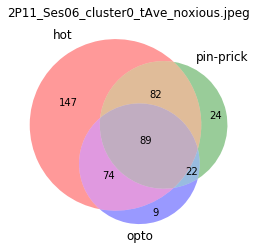

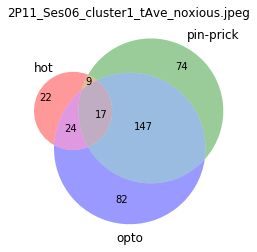

processing:  dF_F0_SHORT_2P11_CFA.csv
2P11_CFA


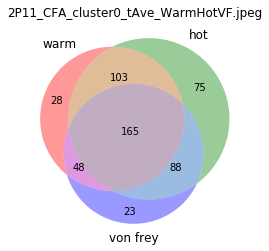

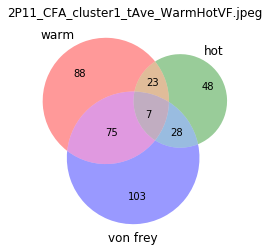

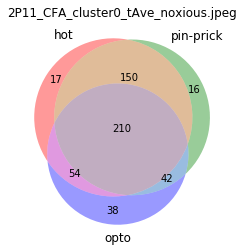

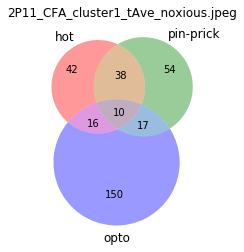

processing:  dF_F0_SHORT_2P05_Ses03.csv
2P05_Ses03


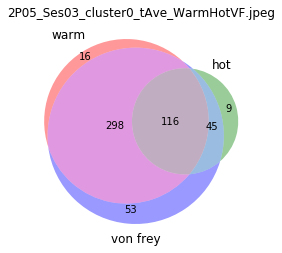

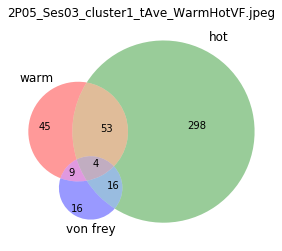

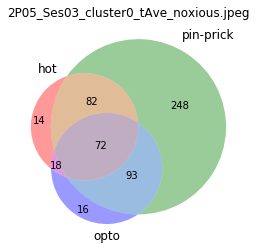

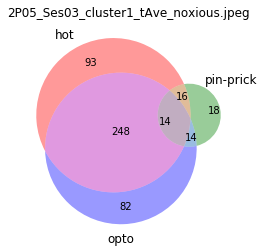

In [29]:
# MAKE VENN DIAGRAMS WITH THREE CATEGORIES ONLY
session_names = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    for s in stimuli:
        trial_means = []
        cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
        modality = cells[cells['identifier'].str.contains(str((s)))]
        modality = modality.reset_index(drop=True)
        trials = modality['identifier'].unique()
        
        for cid in cell_ids[:-1]:
            repli_traces = pd.DataFrame()
            
            for t in trials:
                trace_idx = modality[modality['identifier'].str.contains(str(t))].index.tolist()
                trace = modality[cid]
                temp_trace = trace.loc[trace_idx[0]:trace_idx[-1]]
                temp_trace = temp_trace.reset_index(drop=True)
                repli_traces[t] = temp_trace
            
            trial_means.append(repli_traces.mean(axis=1))
            
        mean_matrix = pd.DataFrame(trial_means, columns=cols)
        
        # calculate and plot pair-wise correlation of concatenated trials for each cell by modality
        #modality = modality.drop('identifier', axis=1)
        #corr_trials = modality.corr().values
        #g = sns.clustermap(corr_trials, method = 'ward', robust=True, rasterized = True)
        #g.fig.suptitle(ses_name + ' ' + s+'_concatenated trials')
        #plt.savefig(os.path.join(output_path, ses_name +'_'+s+'_pair-wise_corr_concat_trials_ward.png'))
        #plt.close()
        
        #cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward',compute_distances=True)
        #cfit = cluster.fit_predict(modality.T)
        #dist = cluster.distances_
        #clusters[s] = cfit
        
        
        # calculate and plot pair-wise correlation of trial means for each cell by modality
        corr_means = mean_matrix.T.corr().values
        #g = sns.clustermap(corr_means, method = 'ward', robust=True, rasterized = True)
        #col_order = g.dendrogram_col.reordered_ind
        #g.fig.suptitle(ses_name + ' ' + s+'_trial means_ward')
        #plt.show()
        #plt.savefig(os.path.join(output_path, ses_name +'_'+s+'_pair-wise_corr_trial_means_ward.png'))
        
        #mean_m = mean_matrix.drop('cell', axis=1)
        cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward', compute_distances=True)
        cfit = cluster.fit_predict(corr_means)
        mean_matrix['cell'] = cell_ids[:-1]
        mean_matrix['cluster'] = cfit
        clusters[s] = cfit
        mean_matrix.to_csv(os.path.join(output_path, ses_name +'_'+ s +'_mean_matrix_3sec.csv'))
    
        
    clusters.to_csv(os.path.join(output_path, ses_name + '_clusters_3sec_ward_trial_ave.csv'))
    

    set1 = set(clusters[clusters['warm']==0]['cell'])
    set2 = set(clusters[clusters['hot']==0]['cell'])
    set3 = set(clusters[clusters['von frey']==0]['cell'])
    venn3([set1, set2, set3], ('warm', 'hot', 'von frey'))
    plt.title(ses_name + '_cluster0_tAve_WarmHotVF.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_cluster0_tAve_WarmHotVF.jpeg'))
    plt.show()

    set1 = set(clusters[clusters['warm']==1]['cell'])
    set2 = set(clusters[clusters['hot']==1]['cell'])
    set3 = set(clusters[clusters['von frey']==1]['cell'])
    venn3([set1, set2, set3], ('warm', 'hot', 'von frey'))
    plt.title(ses_name + '_cluster1_tAve_WarmHotVF.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_cluster1_tAve_WarmHotVF.jpeg'))
    plt.show()
    
    set1 = set(clusters[clusters['hot']==0]['cell'])
    set2 = set(clusters[clusters['pin-prick']==0]['cell'])
    set3 = set(clusters[clusters['opto']==0]['cell'])
    venn3([set1, set2, set3], ('hot', 'pin-prick', 'opto'))
    plt.title(ses_name + '_cluster0_tAve_noxious.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_cluster0_tAve_noxiousl.jpeg'))
    plt.show()
    
    set1 = set(clusters[clusters['hot']==1]['cell'])
    set2 = set(clusters[clusters['pin-prick']==1]['cell'])
    set3 = set(clusters[clusters['opto']==1]['cell'])
    venn3([set1, set2, set3], ('hot', 'pin-prick', 'opto'))
    plt.title(ses_name + '_cluster1_tAve_noxious.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_cluster1_tAve_noxious.jpeg'))
    plt.show()
    
   

In [9]:
# COMPUTE PAIR-WISE CORRELATIONS PRE/POST STIMULUS
session_names = []
corr_means = []
for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    clusters = pd.DataFrame()
    clusters['cell'] = cell_ids[:-1]
    
    for s in stimuli:
        pre = pd.DataFrame()
        post = pd.DataFrame()
        modality = cells[cells['identifier'].str.contains(str((s)))]
        trials = modality['identifier'].unique()
        
        for t in trials:
            trial = modality[modality['identifier']==t]
            preS = trial[:9]
            pre = pd.concat([pre, preS])
            postS = trial[10:]
            post = pd.concat([post, postS])
            
        # calculate and plot pair-wise correlation of concatenated trials for each cell by modality
        pre = pre.drop('identifier', axis=1)
        corr_pre = pre.corr().values
        pre_mean_corr = np.mean(corr_pre)
        corr_means.append([ses_name, s, 'pre', pre_mean_corr])
        #sns.clustermap(corr_pre, method='ward', robust=True, rasterized=True)
        #plt.title(ses_name + ' ' + s+'_corr_concatenated trials pre')
        #plt.savefig(os.path.join(output_path, ses_name +'_'+s+'_pair-wise_corr_concat_trials_pre.png'))
        #plt.show()
        
        post = post.drop('identifier', axis=1)
        corr_post = post.corr().values
        corr_mean_post = np.mean(corr_post)
        corr_means.append([ses_name, s, 'post', corr_mean_post])
        #sns.clustermap(corr_post, method='ward', robust=True, rasterized=True)
        #plt.title(ses_name + ' ' + s+'_corr_concatenated trials post')
        #plt.savefig(os.path.join(output_path, ses_name +'_'+s+'_pair-wise_corr_concat_trials_post.png'))
        #plt.show()
        
cols = ['session', 'modality', 'pre/post', 'mean correlation']
corr_means = pd.DataFrame(corr_means, columns=cols)
corr_means

processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01
processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02
processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03
processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04
processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04
processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05
processing:  dF_F0_SHORT_2P05_Ses06.csv
2P05_Ses06
processing:  dF_F0_SHORT_2P06_Ses06.csv
2P06_Ses06
processing:  dF_F0_SHORT_2P05_Ses07.csv
2P05_Ses07
processing:  dF_F0_SHORT_2P06_Ses07.csv
2P06_Ses07
processing:  dF_F0_SHORT_2P07_Ses01.csv
2P07_Ses01
processing:  dF_F0_SHORT_2P08_Ses01.csv
2P08_Ses01
processing:  dF_F0_SHORT_2P07_Ses03.csv
2P07_Ses03
processing:  dF_F0_SHORT_2P08_Ses02.csv
2P08_Ses02
processing:  dF_F0_SHORT_2P07_Ses04.csv
2P07_Ses04
processing:  dF_F0_SHORT_2P07_Ses05.csv
2P07_Ses05
processing:  dF_F0_SHORT_2P08_Ses04.csv
2P08_Ses04
processing:  dF_F0_SHORT_2P07_Ses06.csv
2P07_Ses06
processing:  dF_F0_SHORT_2P08_Ses05.csv
2P08_Ses05
processing:  dF_F0_SHORT_2P07_S

session   modality pre/post  mean correlation
0    2P06_Ses01       warm      pre          0.016557
1    2P06_Ses01       warm     post          0.005596
2    2P06_Ses01        hot      pre          0.004048
3    2P06_Ses01        hot     post          0.011547
4    2P06_Ses01       opto      pre          0.008297
..          ...        ...      ...               ...
667  2P05_Ses03  pin-prick     post          0.065793
668  2P05_Ses03   approach      pre          0.097800
669  2P05_Ses03   approach     post          0.099966
670  2P05_Ses03    no stim      pre          0.054569
671  2P05_Ses03    no stim     post          0.036108

[672 rows x 4 columns]

[Text(0.5,1,'mean trace correlation across sessions')]

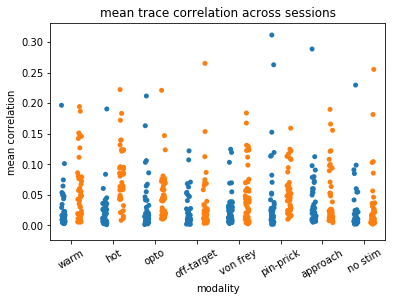

In [11]:
ax = sns.stripplot(x="modality", y="mean correlation", hue="pre/post", data=corr_means, dodge=True)
#ax.legend(bbox_to_anchor= (1.2,1))
ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set(title='mean trace correlation across sessions')